<a href="https://colab.research.google.com/github/olfabre/amsProjetMaster1/blob/olivier/Generation_prenoms_V10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Appareil utilisé : cuda:0
Nombre de prénoms : 9286
Ensemble d'entraînement : 6500, Validation : 1857, Test : 929
Démarrage de l'entraînement...

-----------
|  ENTRAÎNEMENT  |
-----------


Époch 1 : La perte de validation a diminué à 3.8679. Modèle sauvegardé.
Précision validation : 0.0000

Prénoms générés :
- Acff
- Bff
- Ccff
- Dckff
- Ecfifff
0m 0.08s Époch 1/3000, Perte entraînement : 4.0897, Précision entraînement : 0.0000
Perte validation : 3.8679, Précision validation : 0.0000


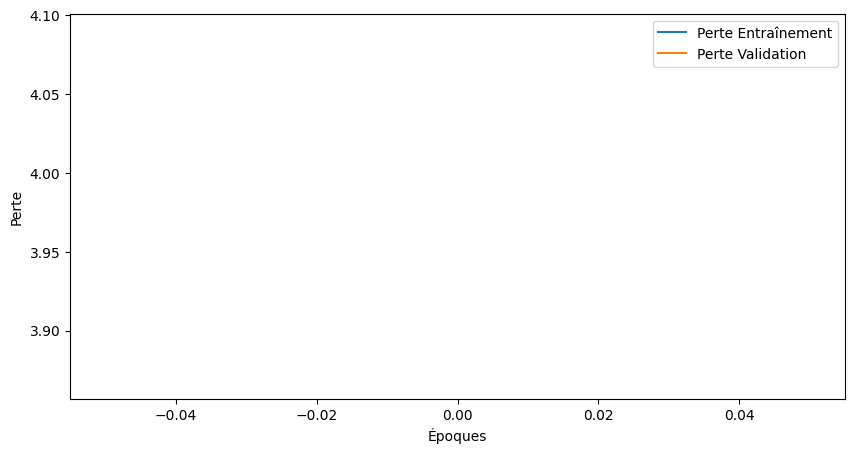

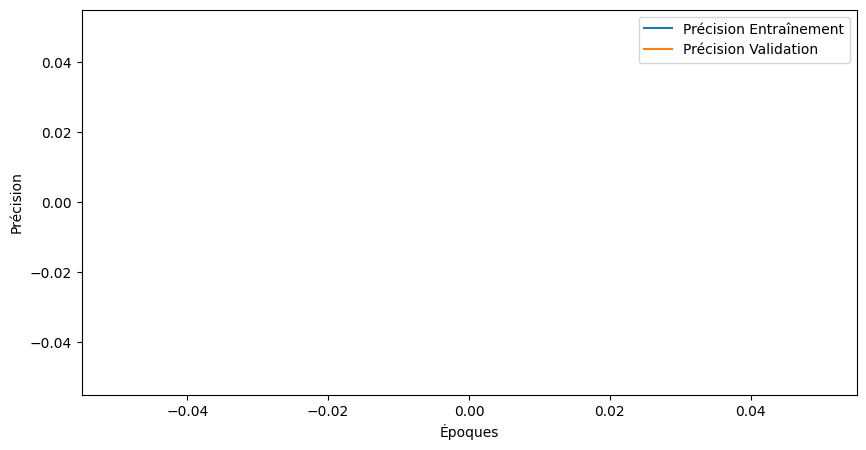


Époch 3 : La perte de validation a diminué à 3.5574. Modèle sauvegardé.
Précision validation : 0.1250

Prénoms générés :
- Ach
- Bch
- Cch
- Dch
- Echi

Époch 4 : La perte de validation a diminué à 3.5139. Modèle sauvegardé.
Précision validation : 0.1111

Prénoms générés :
- Ac
- Bc
- C
- Dc
- Ec

Époch 5 : La perte de validation a diminué à 3.1816. Modèle sauvegardé.
Précision validation : 0.1429

Prénoms générés :
- A
- Bch
- C
- D
- E

Époch 14 : La perte de validation a diminué à 3.0608. Modèle sauvegardé.
Précision validation : 0.3333

Prénoms générés :
- Aoovavavovaaaaaaaaaaa
- Bovvaaaaaavvvaaaaaaaa
- Covvaovvaaaaaaaaaaaaa
- Dovvaaaaaaaaaaaaaaaaa
- Eovvaaaavovvaaaaaaaaa

Époch 18 : La perte de validation a diminué à 2.8776. Modèle sauvegardé.
Précision validation : 0.1667

Prénoms générés :
- Aoin
- Boin
- Coin
- Doin
- Eiin

Époch 19 : La perte de validation a diminué à 2.5397. Modèle sauvegardé.
Précision validation : 0.1250

Prénoms générés :
- Aoi
- Boi
- Coi
- Dov
- Eo

Épo

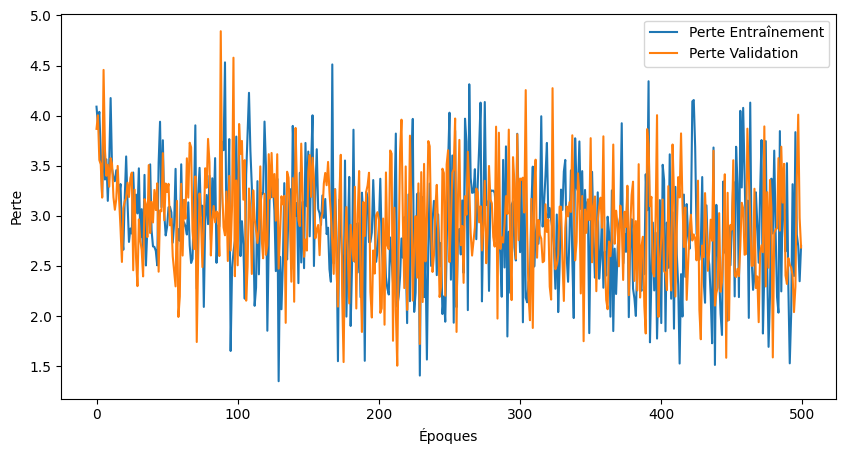

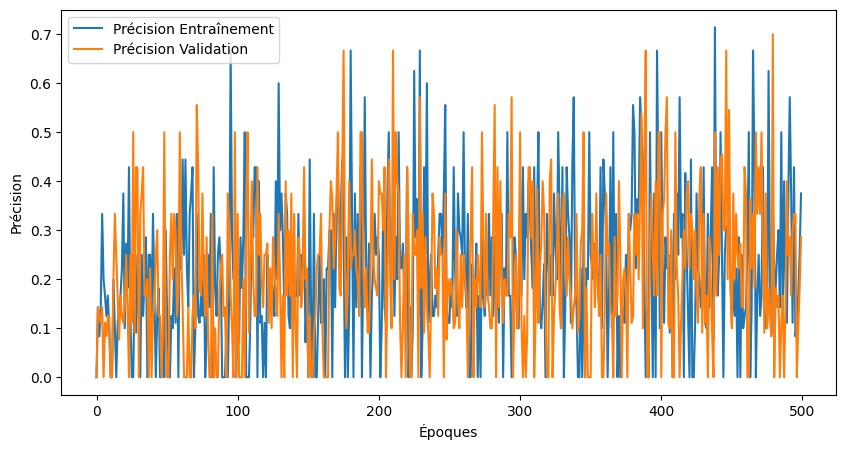


Époch 597 : La perte de validation a diminué à 1.4873. Modèle sauvegardé.
Précision validation : 0.8000

Prénoms générés :
- Aaraasky
- Balil
- Cin
- Dilitshihhlil
- Earaashakhhans

Époch 667 : La perte de validation a diminué à 1.3752. Modèle sauvegardé.
Précision validation : 0.4000

Prénoms générés :
- Aalovov
- Balalov
- Calov
- Dalov
- Ealov

Époch 771 : La perte de validation a diminué à 1.3246. Modèle sauvegardé.
Précision validation : 0.8000

Prénoms générés :
- Aalin
- Balula
- Calin
- Davilov
- Ealin

Époch 959 : La perte de validation a diminué à 0.8558. Modèle sauvegardé.
Précision validation : 0.8571

Prénoms générés :
- Aov
- Bov
- Cov
- Dorenov
- Eorkin
0m 24.17s Époch 1000/3000, Perte entraînement : 3.0825, Précision entraînement : 0.1250
Perte validation : 3.7234, Précision validation : 0.2222


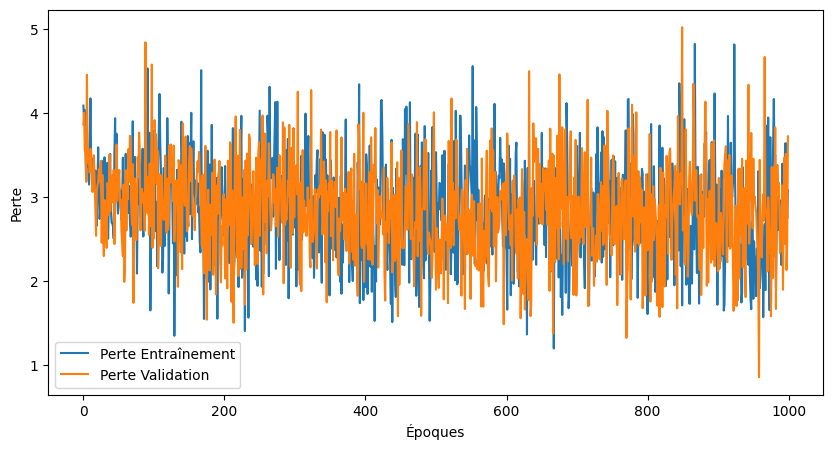

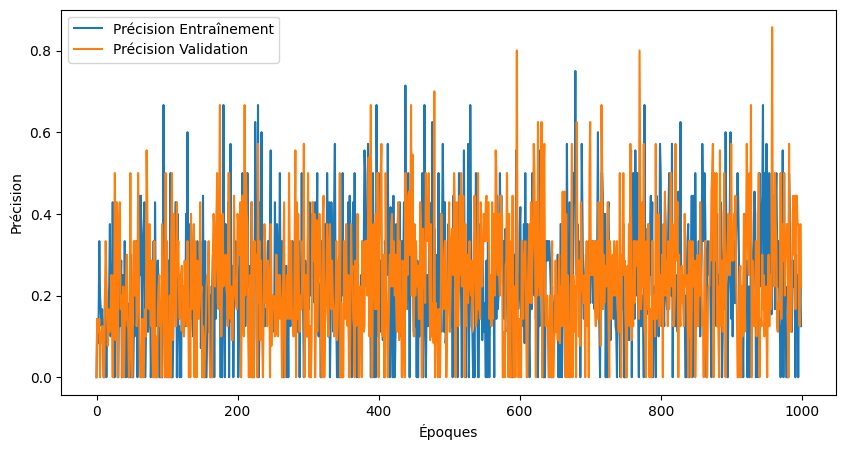

0m 35.64s Époch 1500/3000, Perte entraînement : 3.6106, Précision entraînement : 0.0909
Perte validation : 2.0759, Précision validation : 0.5455


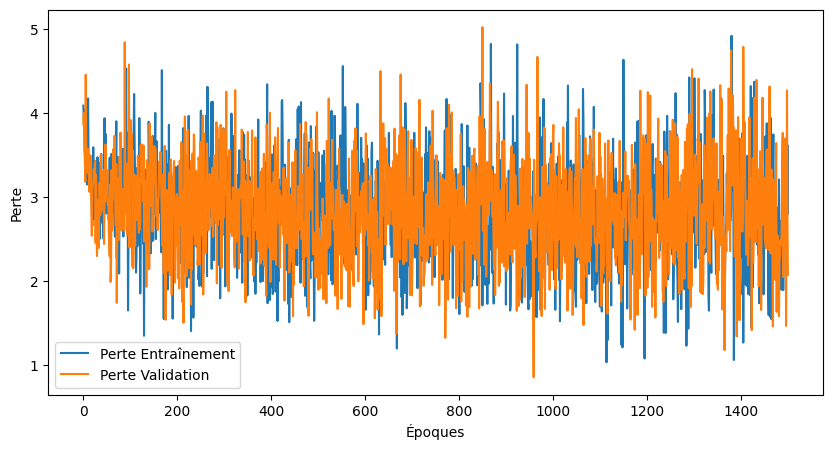

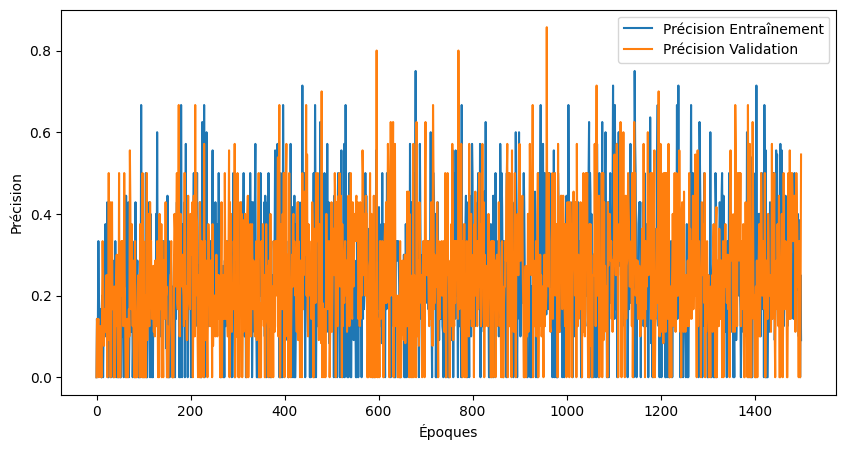

0m 47.09s Époch 2000/3000, Perte entraînement : 2.1354, Précision entraînement : 0.4000
Perte validation : 4.0913, Précision validation : 0.1250


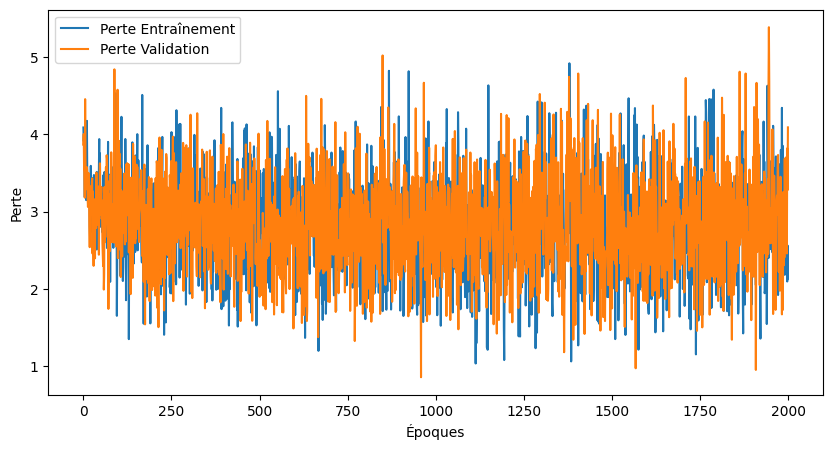

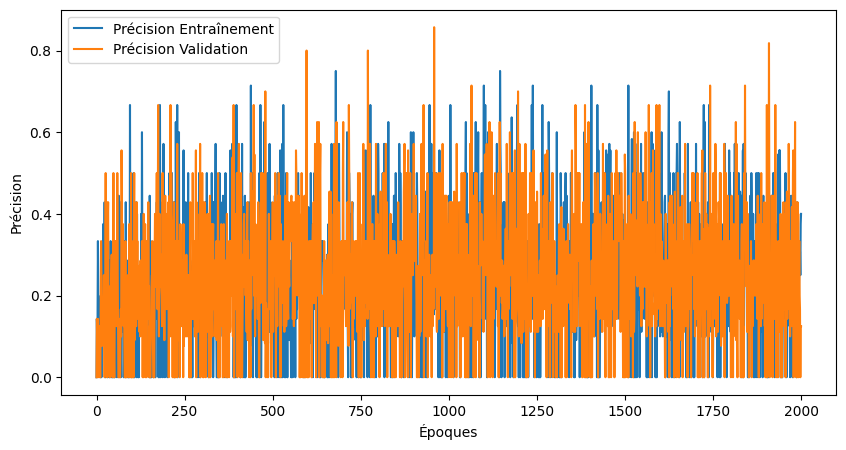

0m 58.56s Époch 2500/3000, Perte entraînement : 2.6559, Précision entraînement : 0.2500
Perte validation : 2.3235, Précision validation : 0.3333


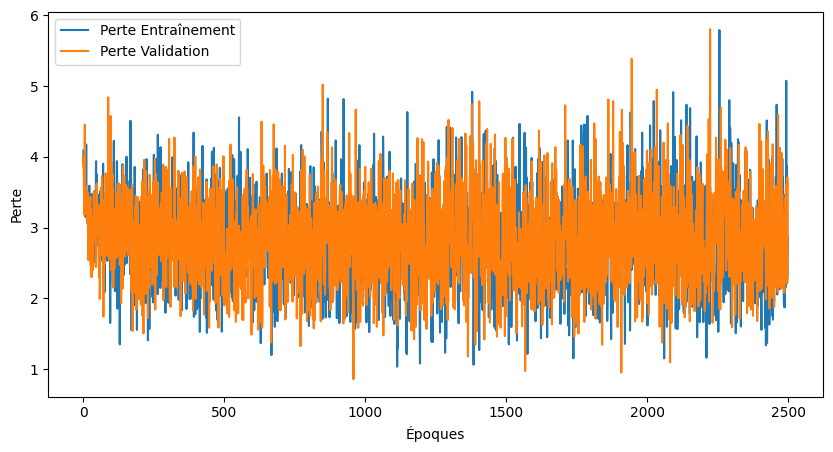

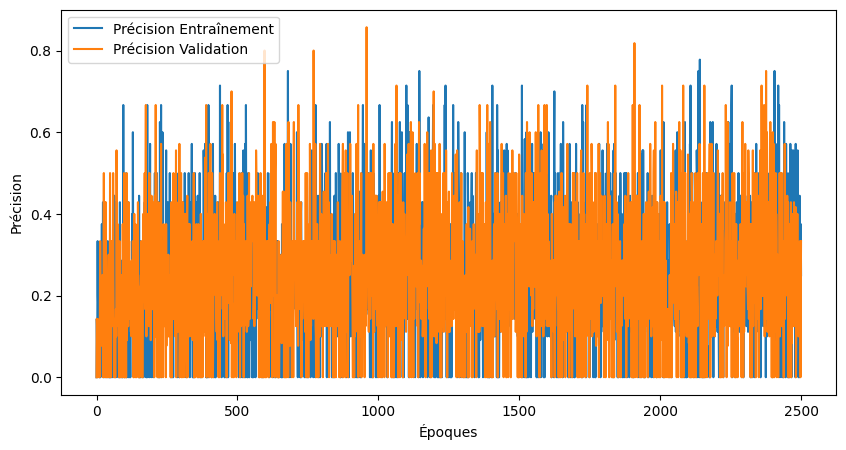

1m 10.20s Époch 3000/3000, Perte entraînement : 3.9611, Précision entraînement : 0.1429
Perte validation : 2.3488, Précision validation : 0.2500


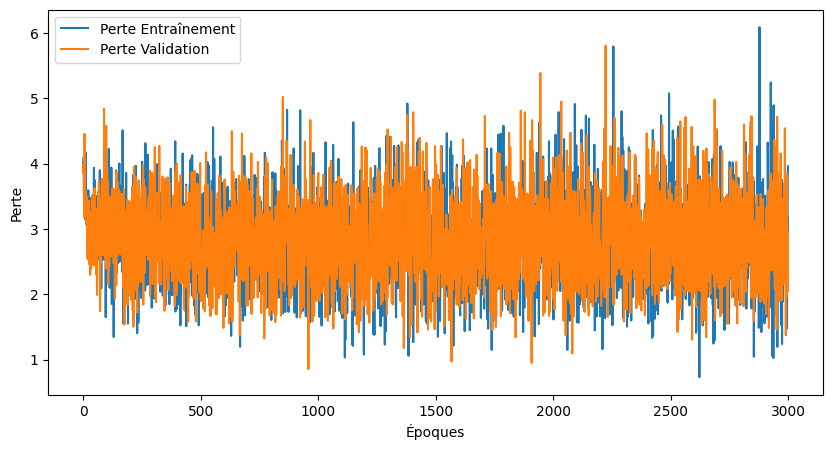

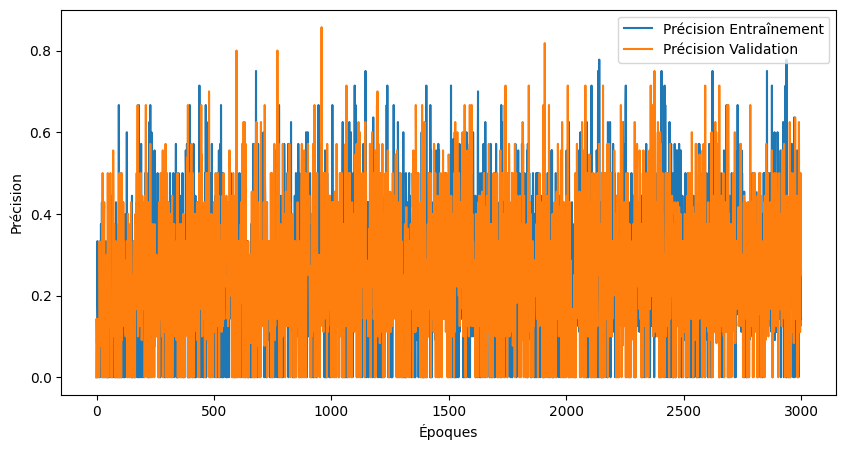


Chargement du meilleur modèle...

-----------
|  ÉVALUATION FINALE |
-----------

Perte moyenne sur l'ensemble de test : 2.5271
Précision moyenne sur l'ensemble de test : 0.2991

Prénoms générés avec le meilleur modèle :
- qov
- wov
- Vov
- Gov
- Dov
- Vov
- Rov
- pov
- wov
- qov
- Dov
- Nov
- Gov
- Gov
- jaranov
- Nov
- Oov
- dov
- Tov
- Wov


In [16]:
import requests
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import string
import random
import os
import matplotlib.pyplot as plt

# Vérification GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# Téléchargement des données
url = "https://olivier-fabre.com/passwordgenius/russian.txt"
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
data_path = os.path.join(data_dir, "russian.txt")

if not os.path.exists(data_path):
    print("Téléchargement des données...")
    response = requests.get(url)
    with open(data_path, 'w', encoding='utf-8') as f:
        f.write(response.text)

# Chargement des données
def unicode_to_ascii(s):
    return ''.join(
        c for c in s if c in (string.ascii_letters + " .,;'-")
    )

def read_lines(filename):
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()

    # Filtrer et nettoyer les lignes
    clean_lines = []
    for line in lines:
        # Convertir en minuscules et supprimer les espaces autour
        line = line.strip().lower()
        # Vérifier que tous les caractères sont alphabétiques
        if all(c in string.ascii_letters for c in line) and len(line) >= 3:
            clean_lines.append(line)

    # Supprimer les doublons et trier les prénoms
    clean_lines = list(set(clean_lines))
    clean_lines.sort()

    return clean_lines




lines = read_lines(data_path)
print(f"Nombre de prénoms : {len(lines)}")

# Division des données
random.shuffle(lines)
train_split = int(0.7 * len(lines))
valid_split = int(0.2 * len(lines))
train_lines = lines[:train_split]
valid_lines = lines[train_split:train_split + valid_split]
test_lines = lines[train_split + valid_split:]
print(f"Ensemble d'entraînement : {len(train_lines)}, Validation : {len(valid_lines)}, Test : {len(test_lines)}")

# Paramètres globaux
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1  # EOS marker
hidden_size = 256
n_layers = 3
lr = 0.003
bidirectional = True
max_length = 20
n_epochs = 3000

# Fonctions utilitaires
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_letters.index(string[c])
    return tensor

def input_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def target_tensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)

def random_training_example(lines):
    line = random.choice(lines)
    input_line_tensor = input_tensor(line)
    target_line_tensor = target_tensor(line)
    return input_line_tensor, target_line_tensor

# Fonction pour afficher le temps écoulé
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m}m {s:.2f}s"

# Définition du modèle
class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=n_layers, bidirectional=self.bidirectional, batch_first=True
        )
        self.out = nn.Linear(self.num_directions * hidden_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)
        hidden_concat = hidden if not self.bidirectional else torch.cat((hidden[0], hidden[1]), 1)
        output = self.out(hidden_concat)
        output = self.dropout(output)
        return self.softmax(output), hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions * n_layers, 1, self.hidden_size, device=device)

# Fonction pour générer des prénoms
def generate_prenoms(decoder, start_letters="ABCDE"):
    print("\nPrénoms générés :")
    for letter in start_letters:
        print(f"- {sample(decoder, letter)}")

def sample(decoder, start_letter="A"):
    with torch.no_grad():
        hidden = decoder.init_hidden()
        input = input_tensor(start_letter)
        output_name = start_letter
        for _ in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            topi = output.topk(1)[1][0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = input_tensor(letter)
        return output_name

# Entraînement avec sauvegarde
def train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion):
    target_line_tensor = target_line_tensor.to(device)
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0
    correct = 0  # Précision
    total = target_line_tensor.size(0)

    for i in range(input_line_tensor.size(0)):
        input_tensor = input_line_tensor[i].to(device)
        target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
        output, hidden = decoder(input_tensor, hidden.detach())
        l = criterion(output, target_tensor)
        loss += l

        # Calcul de la précision
        predicted = output.topk(1)[1][0][0]
        correct += (predicted == target_tensor[0]).item()

    loss.backward()
    decoder_optimizer.step()

    accuracy = correct / total
    return loss.item() / input_line_tensor.size(0), accuracy

def validation(input_line_tensor, target_line_tensor, decoder, criterion):
    with torch.no_grad():
        target_line_tensor = target_line_tensor.to(device)
        hidden = decoder.init_hidden().to(device)
        loss = 0
        correct = 0
        total = target_line_tensor.size(0)

        for i in range(input_line_tensor.size(0)):
            input_tensor = input_line_tensor[i].to(device)
            target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
            output, hidden = decoder(input_tensor, hidden.detach())
            l = criterion(output, target_tensor)
            loss += l

            # Calcul de la précision
            predicted = output.topk(1)[1][0][0]
            correct += (predicted == target_tensor[0]).item()

        accuracy = correct / total
        return loss.item() / input_line_tensor.size(0), accuracy

# Ajustement dynamique du taux d'apprentissage
def adjust_learning_rate(optimizer, epoch, decay_rate=0.5, step=20000):
    if epoch % step == 0 and epoch > 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate
            print(f"Taux d'apprentissage ajusté à : {param_group['lr']}")

# Suivi des pertes et précisions
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction principale d'entraînement
def training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion):
    print("\n-----------\n|  ENTRAÎNEMENT  |\n-----------\n")
    start = time.time()
    best_loss = float("inf")
    model_path = "best_model_generation_prenom.pth"

    for epoch in range(1, n_epochs + 1):
        adjust_learning_rate(decoder_optimizer, epoch)

        input_line_tensor, target_line_tensor = random_training_example(train_lines)
        train_loss, train_acc = train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion)

        input_line_tensor, target_line_tensor = random_training_example(valid_lines)
        val_loss, val_acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(decoder.state_dict(), model_path)
            print(f"\nÉpoch {epoch} : La perte de validation a diminué à {best_loss:.4f}. Modèle sauvegardé.")
            print(f"Précision validation : {val_acc:.4f}")
            generate_prenoms(decoder)

        if epoch % 500 == 0 or epoch == 1:
            print(f"{time_since(start)} Époch {epoch}/{n_epochs}, Perte entraînement : {train_loss:.4f}, Précision entraînement : {train_acc:.4f}")
            print(f"Perte validation : {val_loss:.4f}, Précision validation : {val_acc:.4f}")

            # Afficher les graphiques interactifs
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Perte Entraînement')
            plt.plot(val_losses, label='Perte Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Perte')
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.plot(train_accuracies, label='Précision Entraînement')
            plt.plot(val_accuracies, label='Précision Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Précision')
            plt.show()

# Évaluation finale
def evaluate_model(test_lines, decoder, criterion):
    print("\n-----------\n|  ÉVALUATION FINALE |\n-----------\n")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    decoder.eval()

    with torch.no_grad():
        for line in test_lines:
            input_line_tensor = input_tensor(line)
            target_line_tensor = target_tensor(line)
            loss, acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)
            total_loss += loss
            total_correct += acc * len(line)
            total_samples += len(line)

    avg_loss = total_loss / len(test_lines)
    avg_accuracy = total_correct / total_samples
    print(f"Perte moyenne sur l'ensemble de test : {avg_loss:.4f}")
    print(f"Précision moyenne sur l'ensemble de test : {avg_accuracy:.4f}")

    # Génération de 20 prénoms avec le meilleur modèle
    print("\nPrénoms générés avec le meilleur modèle :")
    for _ in range(20):
        start_letter = random.choice(all_letters)  # Démarrer avec une lettre aléatoire
        print(f"- {sample(decoder, start_letter)}")



# Exécution principale
if __name__ == "__main__":
    decoder = RNNLight(n_letters, hidden_size, n_letters).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()

    print("Démarrage de l'entraînement...")
    training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion)

    print("\nChargement du meilleur modèle...")
    # Chargement sécurisé pour éviter tout code malveillant
    state_dict = torch.load("best_model_generation_prenom.pth", map_location=device, weights_only=True)
    decoder.load_state_dict(state_dict)
    evaluate_model(test_lines, decoder, criterion)

Appareil utilisé : cuda:0
Téléchargement des données...
Nombre de prénoms : 9286
Ensemble d'entraînement : 6500, Validation : 1857, Test : 929
Démarrage de l'entraînement...

-----------
|  ENTRAÎNEMENT  |
-----------


Époch 1 : La perte de validation a diminué à 3.9633. Modèle sauvegardé.
Précision validation : 0.1111

Prénoms générés :
- Asoosoosoosoosoosooso
- Bsoosoosoososoososooo
- Csoosoosoosoosoosonoo
- Dosoosoosoosoosoosoos
- Essoosssoosoosoosooss
0m 1.21s Époch 1/3000, Perte entraînement : 4.0925, Précision entraînement : 0.0000
Perte validation : 3.9633, Précision validation : 0.1111


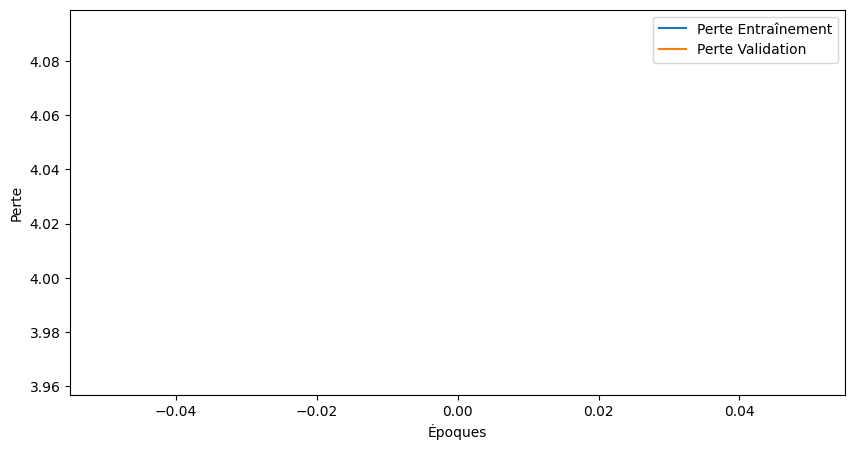

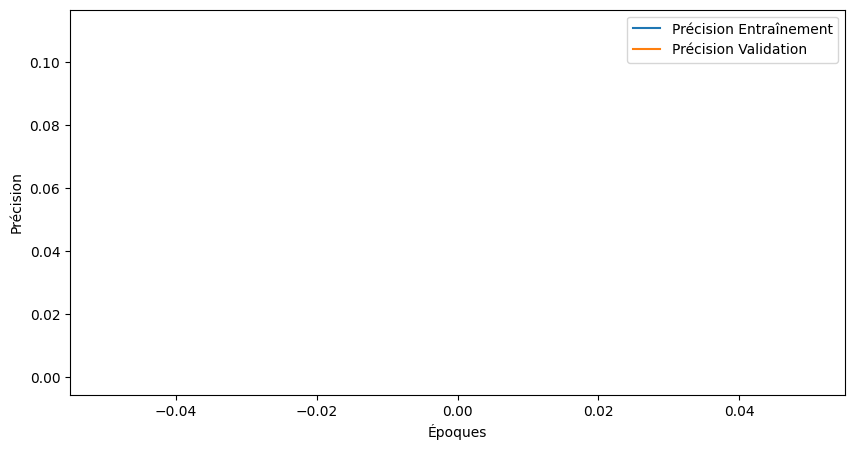


Époch 3 : La perte de validation a diminué à 3.6147. Modèle sauvegardé.
Précision validation : 0.2000

Prénoms générés :
- Aookokkkkokkkkkkkkkkk
- Bakokokkkkkkkkkkkkkkk
- Cokokokkkkkkkkkkkokkk
- Dokokkkkkkokkkkkkkkko
- Eokokkkkokokkkkkkokkk

Époch 4 : La perte de validation a diminué à 3.4724. Modèle sauvegardé.
Précision validation : 0.1250

Prénoms générés :
- Aokko
- Bkok
- Cook
- Dokkk
- Eonk

Époch 5 : La perte de validation a diminué à 2.8328. Modèle sauvegardé.
Précision validation : 0.1429

Prénoms générés :
- Akoko
- Bkok
- Ckok
- Dkok
- Eok

Époch 22 : La perte de validation a diminué à 2.7777. Modèle sauvegardé.
Précision validation : 0.1667

Prénoms générés :
- Aaaannnnnnnnn
- Bakennnnnn
- Caaannnnnnnnnnnnnnn
- Daaaennnnnnnnnnnnnnnn
- Eaaannnnnnnnnnnnnnnnn

Époch 26 : La perte de validation a diminué à 2.6092. Modèle sauvegardé.
Précision validation : 0.3333

Prénoms générés :
- Aaa
- Bra
- Caa
- Dsa
- Eaa

Époch 28 : La perte de validation a diminué à 2.5440. Modèle sauve

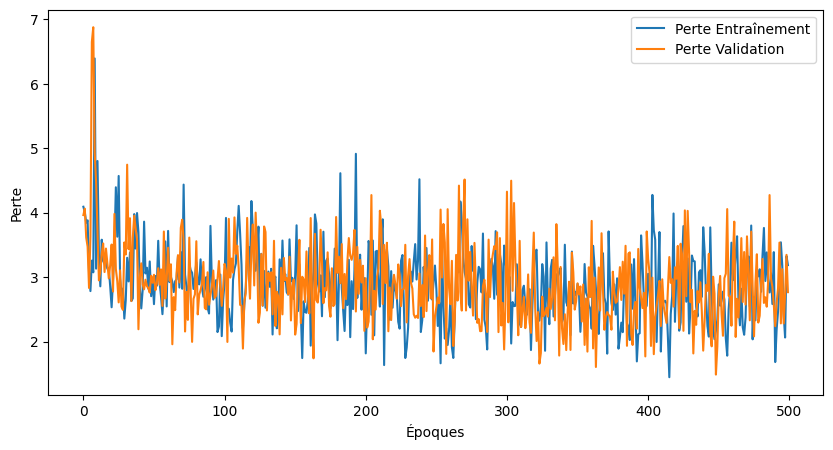

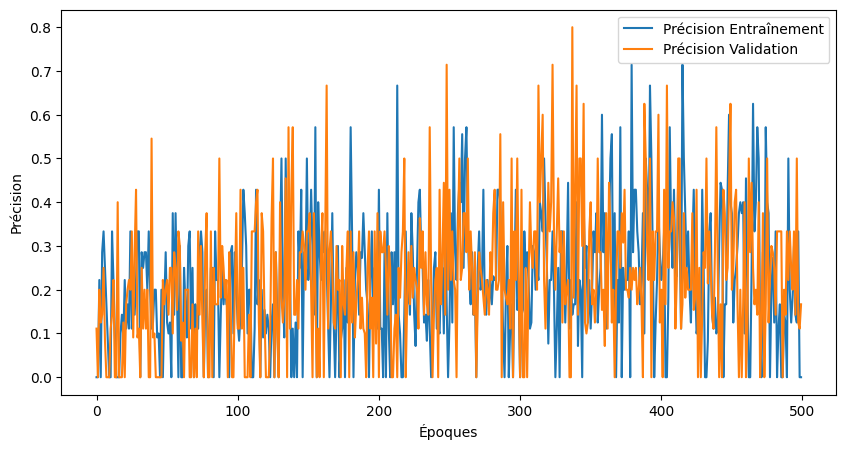


Époch 807 : La perte de validation a diminué à 1.4139. Modèle sauvegardé.
Précision validation : 0.5000

Prénoms générés :
- Aabenkov
- Babov
- Cahankov
- Dabenkov
- Eabenko
0m 24.99s Époch 1000/3000, Perte entraînement : 1.9184, Précision entraînement : 0.5000
Perte validation : 2.7167, Précision validation : 0.1667


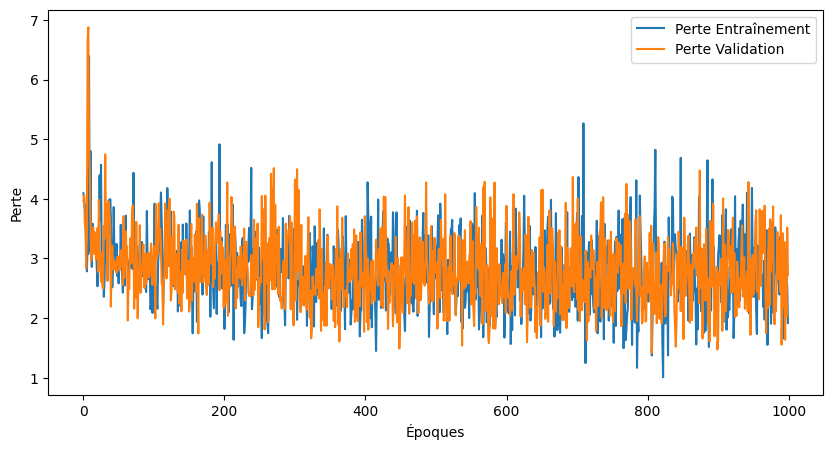

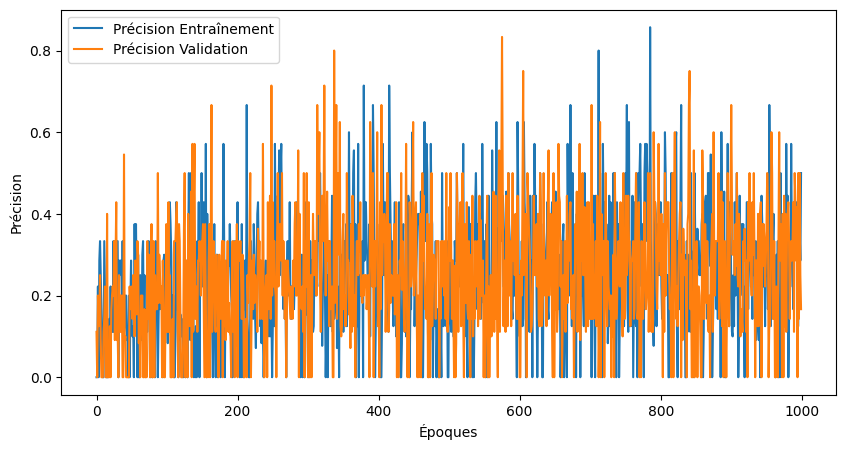


Époch 1079 : La perte de validation a diminué à 1.3329. Modèle sauvegardé.
Précision validation : 0.4000

Prénoms générés :
- Aabushinv
- Babushaov
- Cabushaky
- Dabushanv
- Eabushaov

Époch 1145 : La perte de validation a diminué à 1.2604. Modèle sauvegardé.
Précision validation : 0.5714

Prénoms générés :
- Aadolo
- Banov
- Cinanko
- Danov
- Eanav

Époch 1377 : La perte de validation a diminué à 1.2142. Modèle sauvegardé.
Précision validation : 0.8333

Prénoms générés :
- Aalarch
- Balarch
- Calarch
- Dalarch
- Ealarch
0m 36.68s Époch 1500/3000, Perte entraînement : 3.2573, Précision entraînement : 0.1818
Perte validation : 3.4584, Précision validation : 0.2222


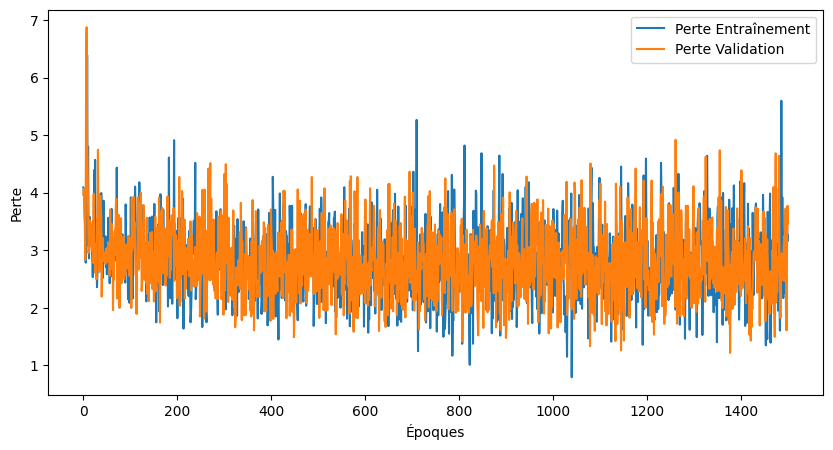

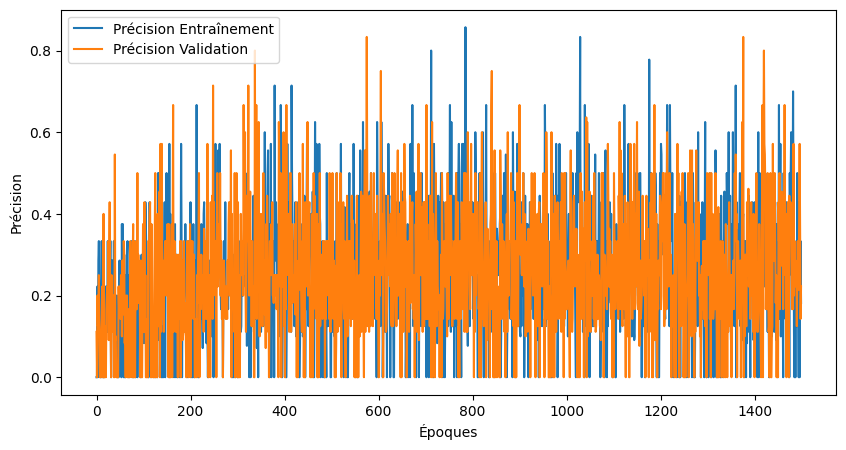

0m 48.10s Époch 2000/3000, Perte entraînement : 2.6967, Précision entraînement : 0.3333
Perte validation : 2.2592, Précision validation : 0.2500


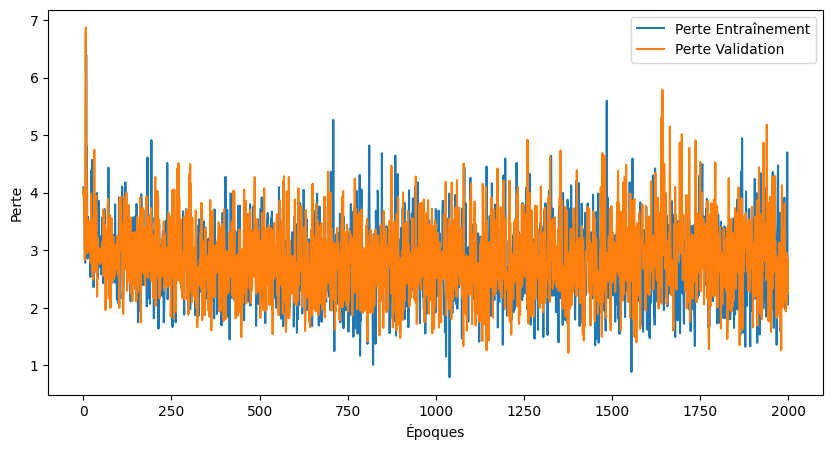

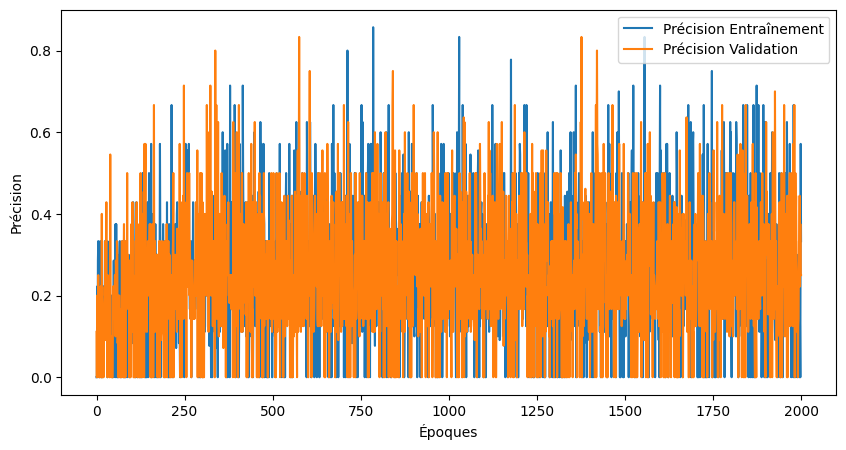


Époch 2005 : La perte de validation a diminué à 1.1789. Modèle sauvegardé.
Précision validation : 0.5714

Prénoms générés :
- Aalainavov
- Baravanov
- Calainavov
- Dalravanov
- Ealainanov
0m 59.65s Époch 2500/3000, Perte entraînement : 2.0173, Précision entraînement : 0.4545
Perte validation : 2.8657, Précision validation : 0.4286


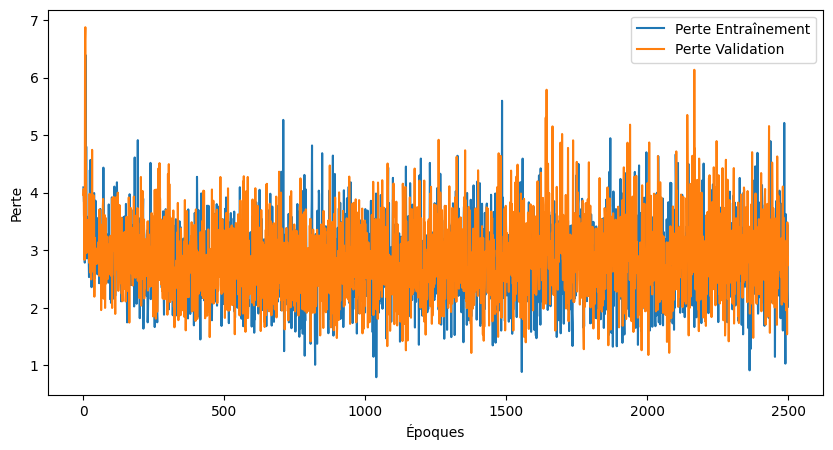

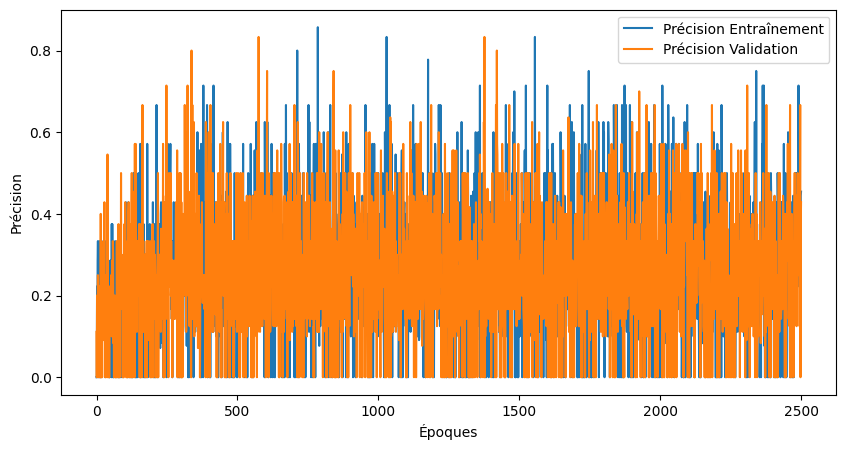


Époch 2699 : La perte de validation a diminué à 0.8410. Modèle sauvegardé.
Précision validation : 0.7000

Prénoms générés :
- Aaskovsky
- Baskovsky
- Caskovsky
- Daskovsky
- Easkovsky
1m 11.88s Époch 3000/3000, Perte entraînement : 1.9672, Précision entraînement : 0.2857
Perte validation : 2.3156, Précision validation : 0.1250


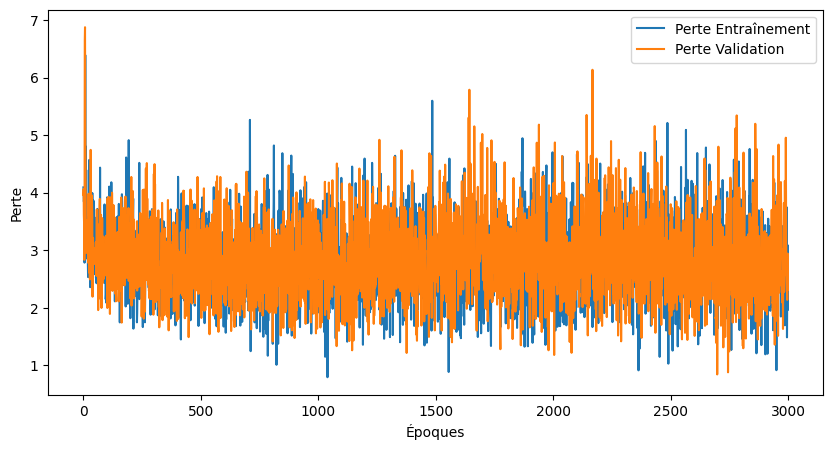

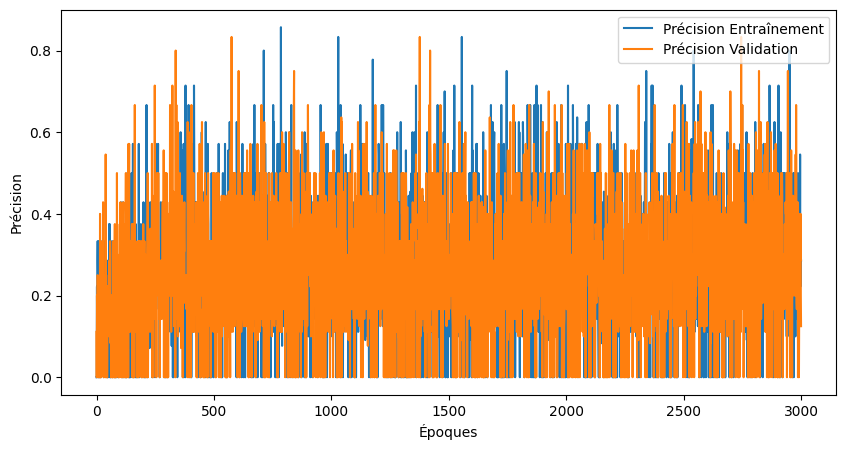


Chargement du meilleur modèle...

-----------
|  ÉVALUATION FINALE |
-----------

Perte moyenne sur l'ensemble de test : 2.7620
Précision moyenne sur l'ensemble de test : 0.2727

Prénoms générés avec le meilleur modèle :
- Aaskovsky
- Baskovsky
- Caskovsky
- Easkovsky
- Faskovsky
- Gaskovsky
- Iaskovsky
- Jaskovsky
- Kaskovsky
- Laskovsky
- Naskovsky
- Oaskovsky
- Paskovsky
- Qaskovsky
- Saskovsky
- Taskovsky
- Uaskovsky
- Vaskovsky
- Yaskovsky
- Zaskovsky


In [1]:
import requests
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import string
import random
import os
import matplotlib.pyplot as plt

# Vérification GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# Téléchargement des données
url = "https://olivier-fabre.com/passwordgenius/russian.txt"
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
data_path = os.path.join(data_dir, "russian.txt")

if not os.path.exists(data_path):
    print("Téléchargement des données...")
    response = requests.get(url)
    with open(data_path, 'w', encoding='utf-8') as f:
        f.write(response.text)

# Chargement des données
def unicode_to_ascii(s):
    return ''.join(
        c for c in s if c in (string.ascii_letters + " .,;'-")
    )

def read_lines(filename):
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()

    # Filtrer et nettoyer les lignes
    clean_lines = []
    for line in lines:
        # Convertir en minuscules et supprimer les espaces autour
        line = line.strip().lower()
        # Vérifier que tous les caractères sont alphabétiques
        if all(c in string.ascii_letters for c in line) and len(line) >= 3:
            clean_lines.append(line)

    # Supprimer les doublons et trier les prénoms
    clean_lines = list(set(clean_lines))
    clean_lines.sort()

    return clean_lines




lines = read_lines(data_path)
print(f"Nombre de prénoms : {len(lines)}")

# Division des données
random.shuffle(lines)
train_split = int(0.7 * len(lines))
valid_split = int(0.2 * len(lines))
train_lines = lines[:train_split]
valid_lines = lines[train_split:train_split + valid_split]
test_lines = lines[train_split + valid_split:]
print(f"Ensemble d'entraînement : {len(train_lines)}, Validation : {len(valid_lines)}, Test : {len(test_lines)}")

# Paramètres globaux
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1  # EOS marker
hidden_size = 256
n_layers = 3
lr = 0.003
bidirectional = True
max_length = 20
n_epochs = 3000

# Fonctions utilitaires
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_letters.index(string[c])
    return tensor

def input_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def target_tensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)

def random_training_example(lines):
    line = random.choice(lines)
    input_line_tensor = input_tensor(line)
    target_line_tensor = target_tensor(line)
    return input_line_tensor, target_line_tensor

# Fonction pour afficher le temps écoulé
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m}m {s:.2f}s"

# Définition du modèle
class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=n_layers, bidirectional=self.bidirectional, batch_first=True
        )
        self.out = nn.Linear(self.num_directions * hidden_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)
        hidden_concat = hidden if not self.bidirectional else torch.cat((hidden[0], hidden[1]), 1)
        output = self.out(hidden_concat)
        output = self.dropout(output)
        return self.softmax(output), hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions * n_layers, 1, self.hidden_size, device=device)

# Fonction pour générer des prénoms
def generate_prenoms(decoder, start_letters="ABCDE"):
    print("\nPrénoms générés :")
    for letter in start_letters:
        print(f"- {sample(decoder, letter)}")

def sample(decoder, start_letter="A"):
    with torch.no_grad():
        hidden = decoder.init_hidden()
        input = input_tensor(start_letter)
        output_name = start_letter.lower()  # Démarrer en minuscule pour le traitement
        for _ in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            topi = output.topk(1)[1][0][0]
            if topi == n_letters - 1:  # Fin de chaîne
                break
            else:
                letter = all_letters[topi]
                if letter.isalpha():  # Garder uniquement les lettres
                    output_name += letter.lower()
                else:
                    break  # Arrêter si un caractère non alphabétique est généré
            input = input_tensor(letter)
        # Capitaliser la première lettre et retourner le prénom
        return output_name.capitalize()


# Entraînement avec sauvegarde
def train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion):
    target_line_tensor = target_line_tensor.to(device)
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0
    correct = 0  # Précision
    total = target_line_tensor.size(0)

    for i in range(input_line_tensor.size(0)):
        input_tensor = input_line_tensor[i].to(device)
        target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
        output, hidden = decoder(input_tensor, hidden.detach())
        l = criterion(output, target_tensor)
        loss += l

        # Calcul de la précision
        predicted = output.topk(1)[1][0][0]
        correct += (predicted == target_tensor[0]).item()

    loss.backward()
    decoder_optimizer.step()

    accuracy = correct / total
    return loss.item() / input_line_tensor.size(0), accuracy

def validation(input_line_tensor, target_line_tensor, decoder, criterion):
    with torch.no_grad():
        target_line_tensor = target_line_tensor.to(device)
        hidden = decoder.init_hidden().to(device)
        loss = 0
        correct = 0
        total = target_line_tensor.size(0)

        for i in range(input_line_tensor.size(0)):
            input_tensor = input_line_tensor[i].to(device)
            target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
            output, hidden = decoder(input_tensor, hidden.detach())
            l = criterion(output, target_tensor)
            loss += l

            # Calcul de la précision
            predicted = output.topk(1)[1][0][0]
            correct += (predicted == target_tensor[0]).item()

        accuracy = correct / total
        return loss.item() / input_line_tensor.size(0), accuracy

# Ajustement dynamique du taux d'apprentissage
def adjust_learning_rate(optimizer, epoch, decay_rate=0.5, step=20000):
    if epoch % step == 0 and epoch > 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate
            print(f"Taux d'apprentissage ajusté à : {param_group['lr']}")

# Suivi des pertes et précisions
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction principale d'entraînement
def training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion):
    print("\n-----------\n|  ENTRAÎNEMENT  |\n-----------\n")
    start = time.time()
    best_loss = float("inf")
    model_path = "best_model_generation_prenom.pth"

    for epoch in range(1, n_epochs + 1):
        adjust_learning_rate(decoder_optimizer, epoch)

        input_line_tensor, target_line_tensor = random_training_example(train_lines)
        train_loss, train_acc = train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion)

        input_line_tensor, target_line_tensor = random_training_example(valid_lines)
        val_loss, val_acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(decoder.state_dict(), model_path)
            print(f"\nÉpoch {epoch} : La perte de validation a diminué à {best_loss:.4f}. Modèle sauvegardé.")
            print(f"Précision validation : {val_acc:.4f}")
            generate_prenoms(decoder)

        if epoch % 500 == 0 or epoch == 1:
            print(f"{time_since(start)} Époch {epoch}/{n_epochs}, Perte entraînement : {train_loss:.4f}, Précision entraînement : {train_acc:.4f}")
            print(f"Perte validation : {val_loss:.4f}, Précision validation : {val_acc:.4f}")

            # Afficher les graphiques interactifs
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Perte Entraînement')
            plt.plot(val_losses, label='Perte Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Perte')
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.plot(train_accuracies, label='Précision Entraînement')
            plt.plot(val_accuracies, label='Précision Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Précision')
            plt.show()

# Évaluation finale
def evaluate_model(test_lines, decoder, criterion):
    print("\n-----------\n|  ÉVALUATION FINALE |\n-----------\n")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    decoder.eval()

    with torch.no_grad():
        for line in test_lines:
            input_line_tensor = input_tensor(line)
            target_line_tensor = target_tensor(line)
            loss, acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)
            total_loss += loss
            total_correct += acc * len(line)
            total_samples += len(line)

    avg_loss = total_loss / len(test_lines)
    avg_accuracy = total_correct / total_samples
    print(f"Perte moyenne sur l'ensemble de test : {avg_loss:.4f}")
    print(f"Précision moyenne sur l'ensemble de test : {avg_accuracy:.4f}")

    # Génération de 20 prénoms uniques avec le meilleur modèle
    print("\nPrénoms générés avec le meilleur modèle :")
    generated_names = set()
    attempts = 0  # Limiter les tentatives pour éviter les boucles infinies
    while len(generated_names) < 20 and attempts < 50:
        start_letter = random.choice(string.ascii_uppercase)  # Démarrer avec une lettre majuscule
        name = sample(decoder, start_letter)
        if len(name) >= 3:  # Assurer une taille minimale de 3 lettres
            generated_names.add(name)
        attempts += 1

    # Afficher les prénoms générés
    for name in sorted(generated_names):  # Trier pour lisibilité
        print(f"- {name}")




# Exécution principale
if __name__ == "__main__":
    decoder = RNNLight(n_letters, hidden_size, n_letters).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()

    print("Démarrage de l'entraînement...")
    training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion)

    print("\nChargement du meilleur modèle...")
    # Chargement sécurisé pour éviter tout code malveillant
    state_dict = torch.load("best_model_generation_prenom.pth", map_location=device, weights_only=True)
    decoder.load_state_dict(state_dict)
    evaluate_model(test_lines, decoder, criterion)

Appareil utilisé : cuda:0
Fichier mélangé avec succès : data/russian_shuffled.txt
Nombre de prénoms : 9286
Ensemble d'entraînement : 6500, Validation : 1857, Test : 929
Démarrage de l'entraînement...

-----------
|  ENTRAÎNEMENT  |
-----------


Époch 1 : La perte de validation a diminué à 3.9838. Modèle sauvegardé.
Précision validation : 0.0000

Prénoms générés :
- Akcciiiiiiiiiiiihiiii
- Bciiiii
- Ck
- Dciiikikiikikiiiiiiii
- Ekiikciaiik
0m 0.12s Époch 1/3000, Perte entraînement : 4.0622, Précision entraînement : 0.1111
Perte validation : 3.9838, Précision validation : 0.0000


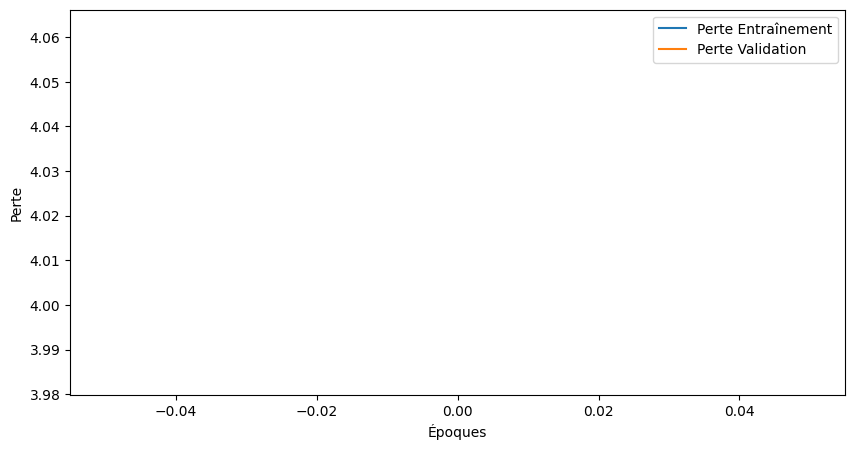

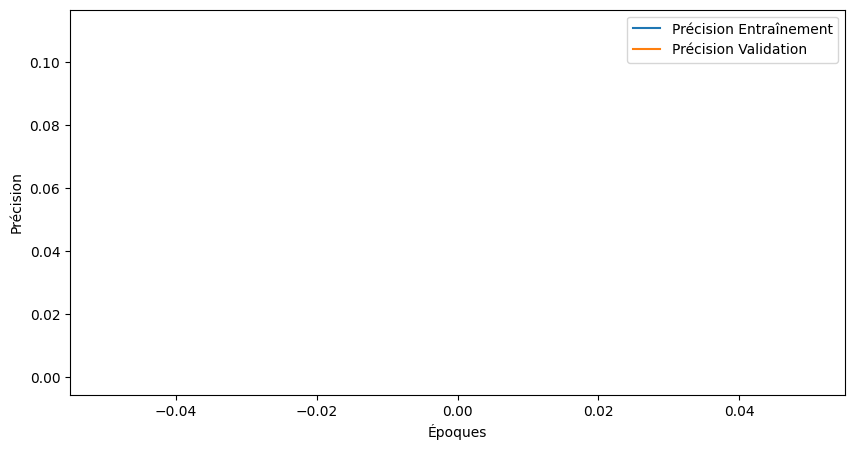


Époch 2 : La perte de validation a diminué à 3.7039. Modèle sauvegardé.
Précision validation : 0.2222

Prénoms générés :
- Aiaaiikiiiikk
- Bciaia
- Ck
- Dkii
- Ek

Époch 3 : La perte de validation a diminué à 3.2179. Modèle sauvegardé.
Précision validation : 0.4000

Prénoms générés :
- Aiiii
- B
- Ciiaiiii
- Dkii
- Eii

Époch 8 : La perte de validation a diminué à 3.1680. Modèle sauvegardé.
Précision validation : 0.1429

Prénoms générés :
- Aamnnnnnnnnynynynnnky
- Bai
- Cinnonnnnnnnnnyynnnon
- Dinnnynnnnonnnnon
- Ein

Époch 24 : La perte de validation a diminué à 3.0316. Modèle sauvegardé.
Précision validation : 0.2000

Prénoms générés :
- Ahhv
- Bnoh
- Chahanv
- Dhavhvv
- Ehav

Époch 25 : La perte de validation a diminué à 3.0082. Modèle sauvegardé.
Précision validation : 0.3000

Prénoms générés :
- Ahahaov
- Bhahaoy
- Chahano
- Dhahaovnoo
- Enovayv

Époch 40 : La perte de validation a diminué à 2.9412. Modèle sauvegardé.
Précision validation : 0.4286

Prénoms générés :
- Aiiiiiiv
- 

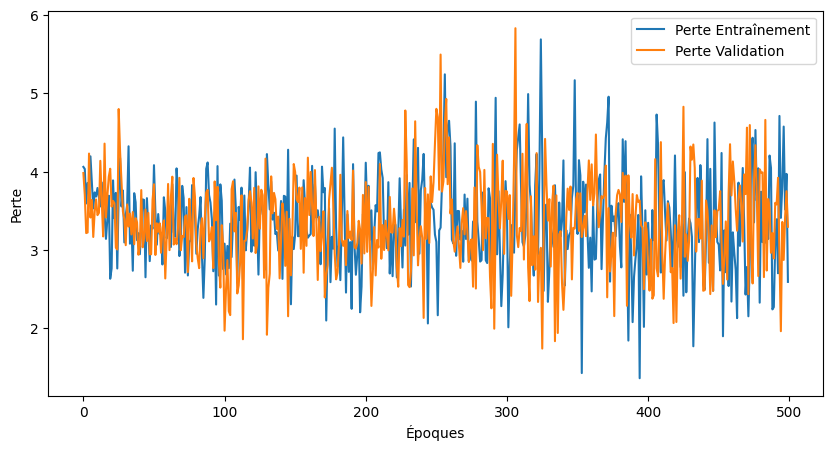

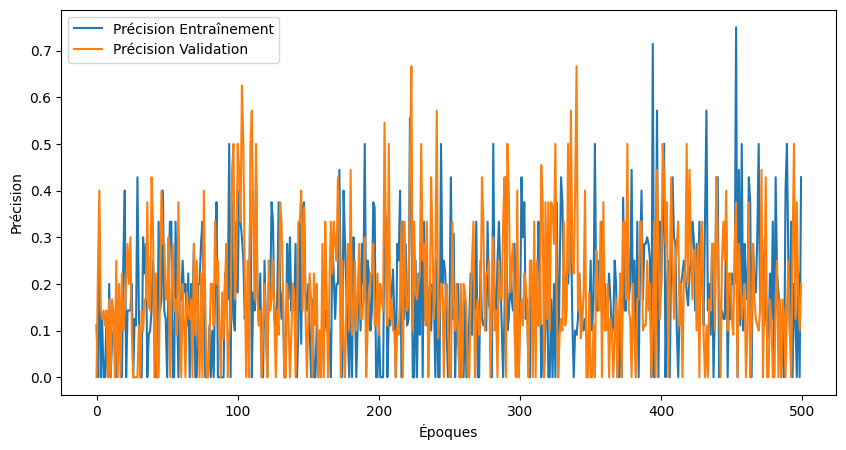


Époch 808 : La perte de validation a diminué à 1.7338. Modèle sauvegardé.
Précision validation : 0.6000

Prénoms générés :
- Ainevcoe
- Bov
- Cichenkin
- Dinevboiv
- Eon
0m 23.40s Époch 1000/3000, Perte entraînement : 1.7331, Précision entraînement : 0.5714
Perte validation : 2.6172, Précision validation : 0.2000


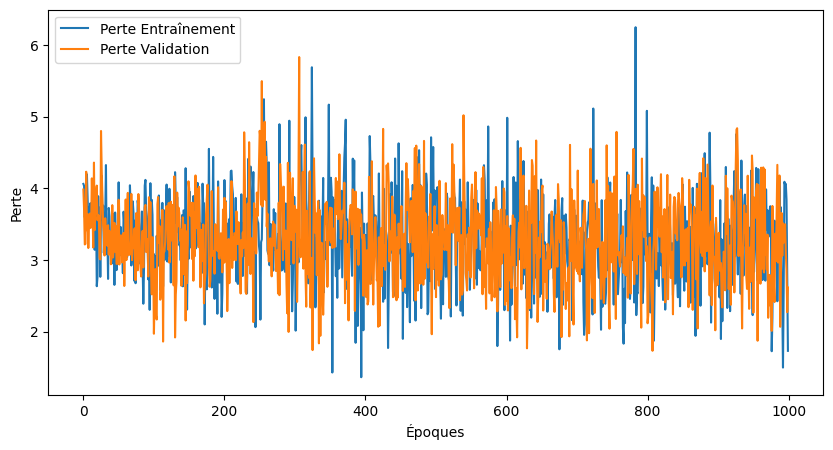

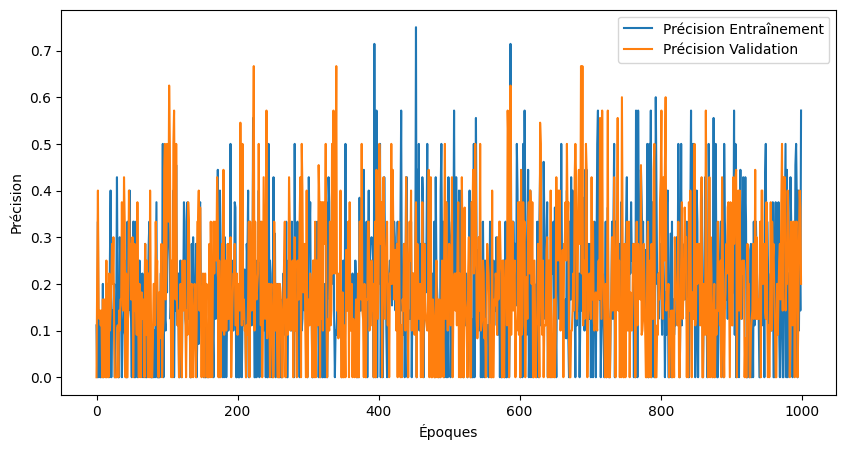


Époch 1037 : La perte de validation a diminué à 1.6971. Modèle sauvegardé.
Précision validation : 0.5714

Prénoms générés :
- Aovocd
- Batoldov
- Calovkcof
- Dalovkc
- Ehalov

Époch 1095 : La perte de validation a diminué à 1.3839. Modèle sauvegardé.
Précision validation : 0.5000

Prénoms générés :
- Aov
- Burun
- Camov
- Dankh
- Eankov

Époch 1315 : La perte de validation a diminué à 1.2349. Modèle sauvegardé.
Précision validation : 0.6000

Prénoms générés :
- Aov
- Bov
- Carymov
- Dalovov
- Ealovov
0m 34.85s Époch 1500/3000, Perte entraînement : 2.9086, Précision entraînement : 0.2500
Perte validation : 2.1454, Précision validation : 0.5000


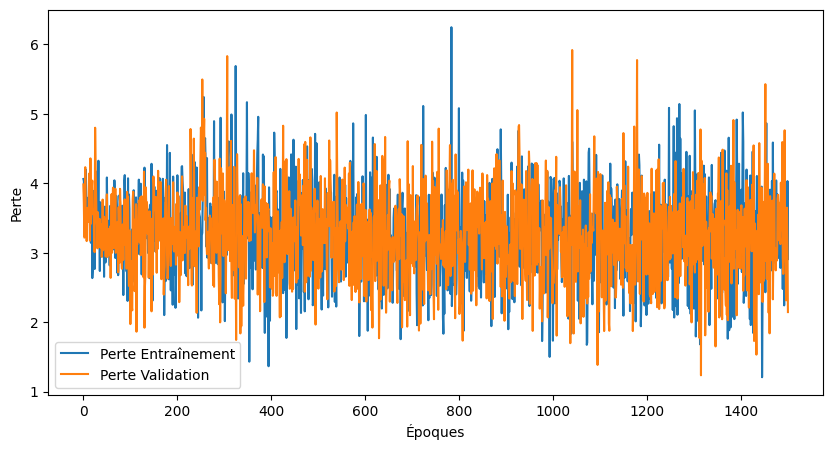

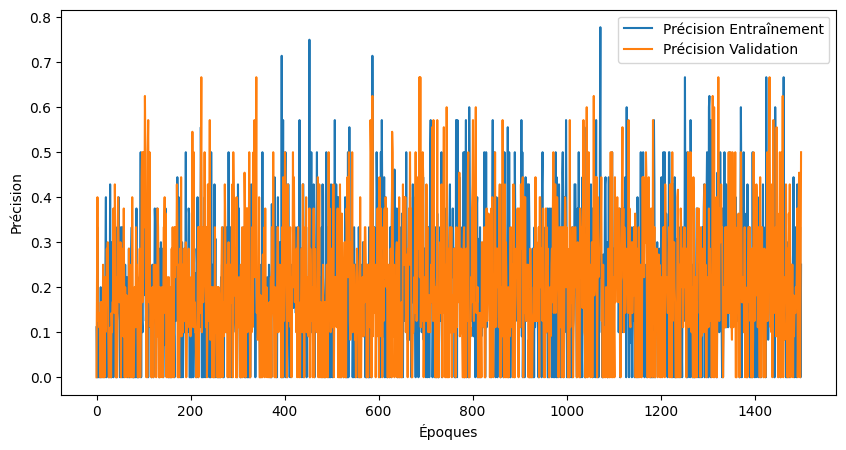

0m 46.36s Époch 2000/3000, Perte entraînement : 2.8980, Précision entraînement : 0.4286
Perte validation : 3.1377, Précision validation : 0.1667


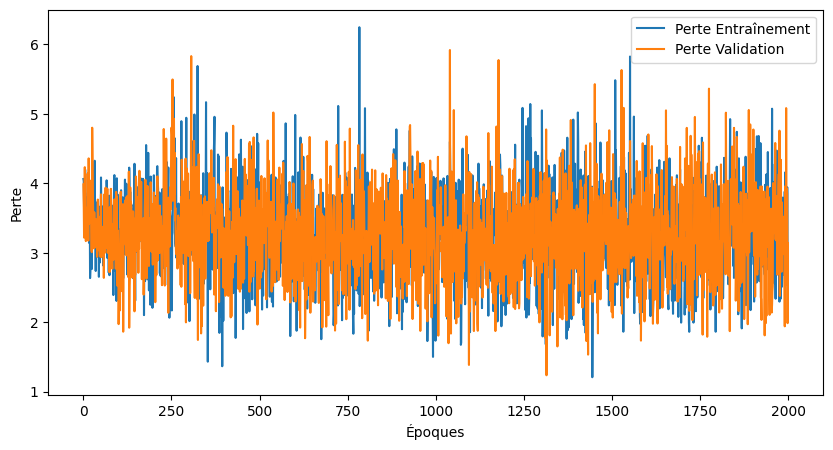

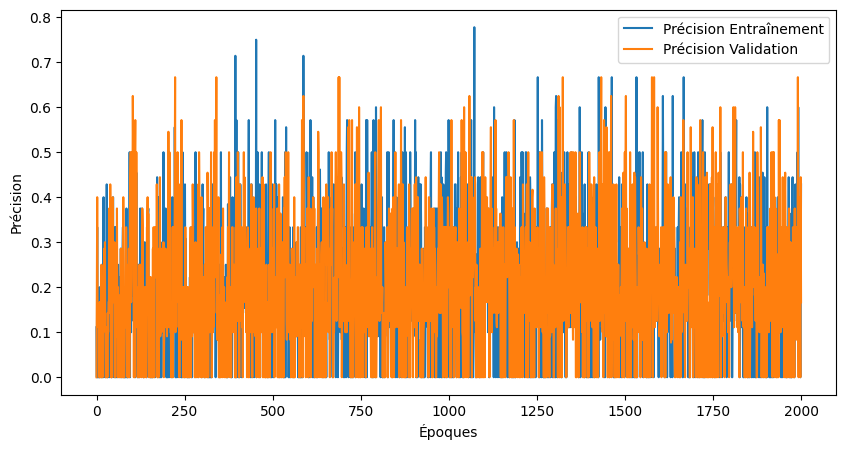

0m 57.89s Époch 2500/3000, Perte entraînement : 4.9040, Précision entraînement : 0.1250
Perte validation : 4.0945, Précision validation : 0.1000


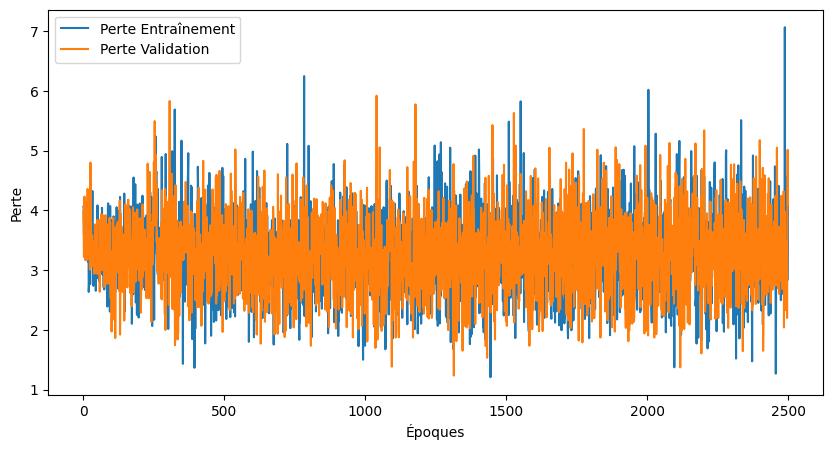

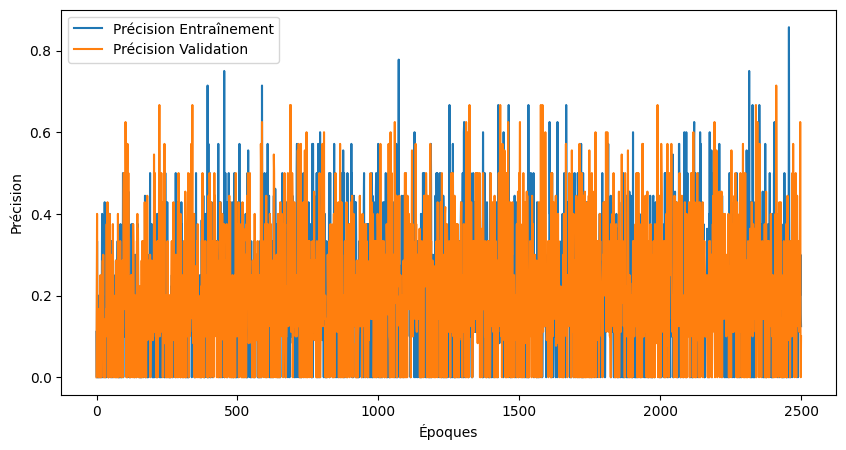

1m 9.19s Époch 3000/3000, Perte entraînement : 3.0109, Précision entraînement : 0.3750
Perte validation : 2.4935, Précision validation : 0.4286


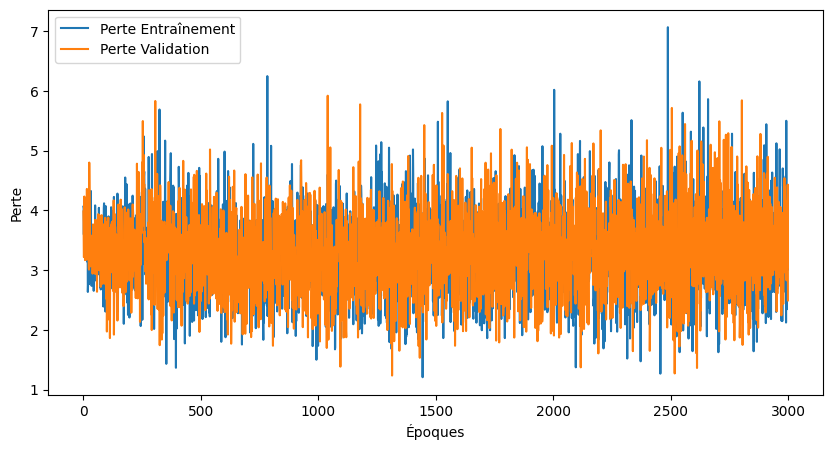

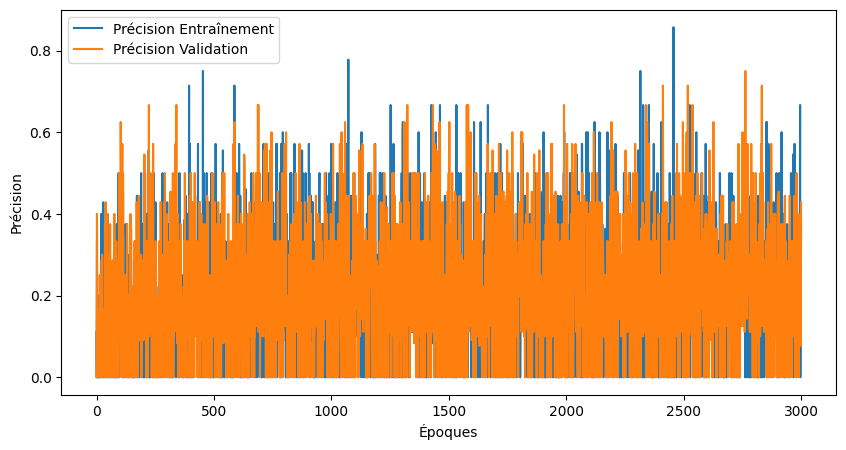


Chargement du meilleur modèle...

-----------
|  ÉVALUATION FINALE |
-----------

Perte moyenne sur l'ensemble de test : 2.6015
Précision moyenne sur l'ensemble de test : 0.2625

Prénoms générés avec le meilleur modèle :
- Aalovov
- Balovov
- Calovov
- Ealovov
- Falovov
- Galovov
- Kalovov
- Lalovov
- Nalovov
- Oalovov
- Palovov
- Qalovov
- Ralovov
- Salovov
- Talovov
- Valovov
- Walovov
- Xalovov
- Yalovov
- Zalovov


In [12]:
import requests
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import string
import random
import os
import matplotlib.pyplot as plt
import subprocess

# Vérification GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# Téléchargement des données
url = "https://olivier-fabre.com/passwordgenius/russian.txt"
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
data_path = os.path.join(data_dir, "russian.txt")
shuffled_data_path = os.path.join(data_dir, "russian_shuffled.txt")

if not os.path.exists(data_path):
    print("Téléchargement des données...")
    response = requests.get(url)
    with open(data_path, 'w', encoding='utf-8') as f:
        f.write(response.text)





def shuffle_file(input_path, output_path):
    """
    Désordonne les lignes d'un fichier en utilisant la commande Bash `shuf`.
    """
    try:
        subprocess.run(['shuf', input_path, '-o', output_path], check=True)
        print(f"Fichier mélangé avec succès : {output_path}")
    except FileNotFoundError:
        print("Erreur : La commande `shuf` n'est pas disponible. Assurez-vous qu'elle est installée.")
        exit(1)








# Chargement des données
def unicode_to_ascii(s):
    return ''.join(
        c for c in s if c in (string.ascii_letters + " .,;'-")
    )

def read_lines(filename):
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()

    # Filtrer et nettoyer les lignes
    clean_lines = []
    for line in lines:
        # Convertir en minuscules et supprimer les espaces autour
        line = line.strip().lower()
        # Vérifier que tous les caractères sont alphabétiques
        if all(c in string.ascii_letters for c in line) and len(line) >= 3:
            clean_lines.append(line)

    # Supprimer les doublons et trier les prénoms
    clean_lines = list(set(clean_lines))
    clean_lines.sort()

    return clean_lines


# Mélanger les lignes du fichier
shuffle_file(data_path, shuffled_data_path)

# Charger le fichier mélangé
lines = read_lines(shuffled_data_path)
print(f"Nombre de prénoms : {len(lines)}")

# Division des données
random.shuffle(lines)
train_split = int(0.7 * len(lines))
valid_split = int(0.2 * len(lines))
train_lines = lines[:train_split]
valid_lines = lines[train_split:train_split + valid_split]
test_lines = lines[train_split + valid_split:]
print(f"Ensemble d'entraînement : {len(train_lines)}, Validation : {len(valid_lines)}, Test : {len(test_lines)}")

# Paramètres globaux
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1  # EOS marker
hidden_size = 256
n_layers = 3
lr = 0.003
bidirectional = True
max_length = 20
n_epochs = 3000

# Fonctions utilitaires
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_letters.index(string[c])
    return tensor

def input_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def target_tensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)

def random_training_example(lines):
    line = random.choice(lines)
    input_line_tensor = input_tensor(line)
    target_line_tensor = target_tensor(line)
    return input_line_tensor, target_line_tensor

# Fonction pour afficher le temps écoulé
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m}m {s:.2f}s"

# Définition du modèle
class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=n_layers, bidirectional=self.bidirectional, batch_first=True
        )
        self.out = nn.Linear(self.num_directions * hidden_size, output_size)
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)
        hidden_concat = hidden if not self.bidirectional else torch.cat((hidden[0], hidden[1]), 1)
        output = self.out(hidden_concat)
        output = self.dropout(output)
        return self.softmax(output), hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions * n_layers, 1, self.hidden_size, device=device)

# Fonction pour générer des prénoms
def generate_prenoms(decoder, start_letters="ABCDE"):
    print("\nPrénoms générés :")
    for letter in start_letters:
        print(f"- {sample(decoder, letter)}")

def sample(decoder, start_letter="A"):
    with torch.no_grad():
        hidden = decoder.init_hidden()
        input = input_tensor(start_letter)
        output_name = start_letter.lower()  # Démarrer en minuscule pour le traitement
        for _ in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            topi = output.topk(1)[1][0][0]
            if topi == n_letters - 1:  # Fin de chaîne
                break
            else:
                letter = all_letters[topi]
                if letter.isalpha():  # Garder uniquement les lettres
                    output_name += letter.lower()
                else:
                    break  # Arrêter si un caractère non alphabétique est généré
            input = input_tensor(letter)
        # Capitaliser la première lettre et retourner le prénom
        return output_name.capitalize()


# Entraînement avec sauvegarde
def train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion):
    target_line_tensor = target_line_tensor.to(device)
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0
    correct = 0  # Précision
    total = target_line_tensor.size(0)

    for i in range(input_line_tensor.size(0)):
        input_tensor = input_line_tensor[i].to(device)
        target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
        output, hidden = decoder(input_tensor, hidden.detach())
        l = criterion(output, target_tensor)
        loss += l

        # Calcul de la précision
        predicted = output.topk(1)[1][0][0]
        correct += (predicted == target_tensor[0]).item()

    loss.backward()
    decoder_optimizer.step()

    accuracy = correct / total
    return loss.item() / input_line_tensor.size(0), accuracy

def validation(input_line_tensor, target_line_tensor, decoder, criterion):
    with torch.no_grad():
        target_line_tensor = target_line_tensor.to(device)
        hidden = decoder.init_hidden().to(device)
        loss = 0
        correct = 0
        total = target_line_tensor.size(0)

        for i in range(input_line_tensor.size(0)):
            input_tensor = input_line_tensor[i].to(device)
            target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
            output, hidden = decoder(input_tensor, hidden.detach())
            l = criterion(output, target_tensor)
            loss += l

            # Calcul de la précision
            predicted = output.topk(1)[1][0][0]
            correct += (predicted == target_tensor[0]).item()

        accuracy = correct / total
        return loss.item() / input_line_tensor.size(0), accuracy

# Ajustement dynamique du taux d'apprentissage
def adjust_learning_rate(optimizer, epoch, decay_rate=0.5, step=20000):
    if epoch % step == 0 and epoch > 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate
            print(f"Taux d'apprentissage ajusté à : {param_group['lr']}")

# Suivi des pertes et précisions
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction principale d'entraînement
def training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion):
    print("\n-----------\n|  ENTRAÎNEMENT  |\n-----------\n")
    start = time.time()
    best_loss = float("inf")
    model_path = "best_model_generation_prenom.pth"

    for epoch in range(1, n_epochs + 1):
        adjust_learning_rate(decoder_optimizer, epoch)

        input_line_tensor, target_line_tensor = random_training_example(train_lines)
        train_loss, train_acc = train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion)

        input_line_tensor, target_line_tensor = random_training_example(valid_lines)
        val_loss, val_acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(decoder.state_dict(), model_path)
            print(f"\nÉpoch {epoch} : La perte de validation a diminué à {best_loss:.4f}. Modèle sauvegardé.")
            print(f"Précision validation : {val_acc:.4f}")
            generate_prenoms(decoder)

        if epoch % 500 == 0 or epoch == 1:
            print(f"{time_since(start)} Époch {epoch}/{n_epochs}, Perte entraînement : {train_loss:.4f}, Précision entraînement : {train_acc:.4f}")
            print(f"Perte validation : {val_loss:.4f}, Précision validation : {val_acc:.4f}")

            # Afficher les graphiques interactifs
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Perte Entraînement')
            plt.plot(val_losses, label='Perte Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Perte')
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.plot(train_accuracies, label='Précision Entraînement')
            plt.plot(val_accuracies, label='Précision Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Précision')
            plt.show()

# Évaluation finale
def evaluate_model(test_lines, decoder, criterion):
    print("\n-----------\n|  ÉVALUATION FINALE |\n-----------\n")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    decoder.eval()

    with torch.no_grad():
        for line in test_lines:
            input_line_tensor = input_tensor(line)
            target_line_tensor = target_tensor(line)
            loss, acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)
            total_loss += loss
            total_correct += acc * len(line)
            total_samples += len(line)

    avg_loss = total_loss / len(test_lines)
    avg_accuracy = total_correct / total_samples
    print(f"Perte moyenne sur l'ensemble de test : {avg_loss:.4f}")
    print(f"Précision moyenne sur l'ensemble de test : {avg_accuracy:.4f}")

    # Génération de 20 prénoms uniques avec le meilleur modèle
    print("\nPrénoms générés avec le meilleur modèle :")
    generated_names = set()
    attempts = 0  # Limiter les tentatives pour éviter les boucles infinies
    while len(generated_names) < 20 and attempts < 50:
        start_letter = random.choice(string.ascii_uppercase)  # Démarrer avec une lettre majuscule
        name = sample(decoder, start_letter)
        if len(name) >= 3:  # Assurer une taille minimale de 3 lettres
            generated_names.add(name)
        attempts += 1

    # Afficher les prénoms générés
    for name in sorted(generated_names):  # Trier pour lisibilité
        print(f"- {name}")




# Exécution principale
if __name__ == "__main__":
    decoder = RNNLight(n_letters, hidden_size, n_letters).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()

    print("Démarrage de l'entraînement...")
    training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion)

    print("\nChargement du meilleur modèle...")
    # Chargement sécurisé pour éviter tout code malveillant
    state_dict = torch.load("best_model_generation_prenom.pth", map_location=device, weights_only=True)
    decoder.load_state_dict(state_dict)
    evaluate_model(test_lines, decoder, criterion)

Appareil utilisé : cuda:0
Fichier mélangé avec succès : data/russian_shuffled.txt
Nombre de prénoms : 9286
Ensemble d'entraînement : 6500, Validation : 1857, Test : 929
Démarrage de l'entraînement...

-----------
|  ENTRAÎNEMENT  |
-----------


Époch 1 : La perte de validation a diminué à 3.8684. Modèle sauvegardé.
Précision validation : 0.1000

Prénoms générés :
- Aznuez
- Bovwrqxa
- Cbrb
- Dhzklv
- Elsvmbmxciphfc
0m 0.16s Époch 1/3000, Perte entraînement : 4.0512, Précision entraînement : 0.2500
Perte validation : 3.8684, Précision validation : 0.1000


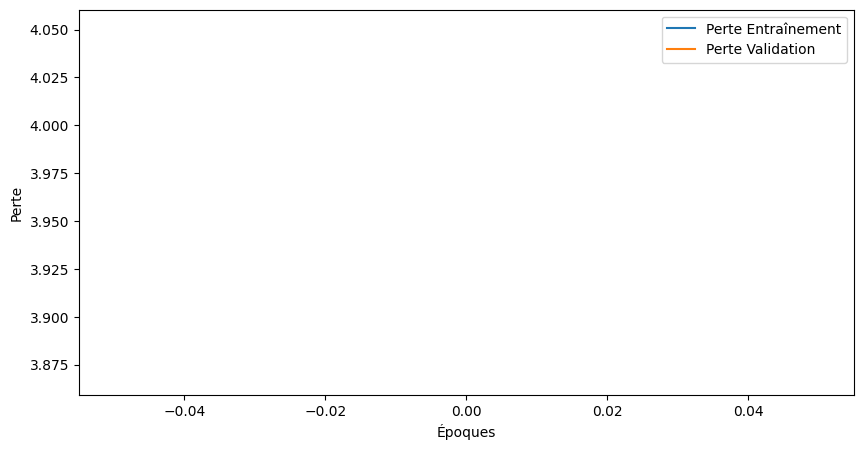

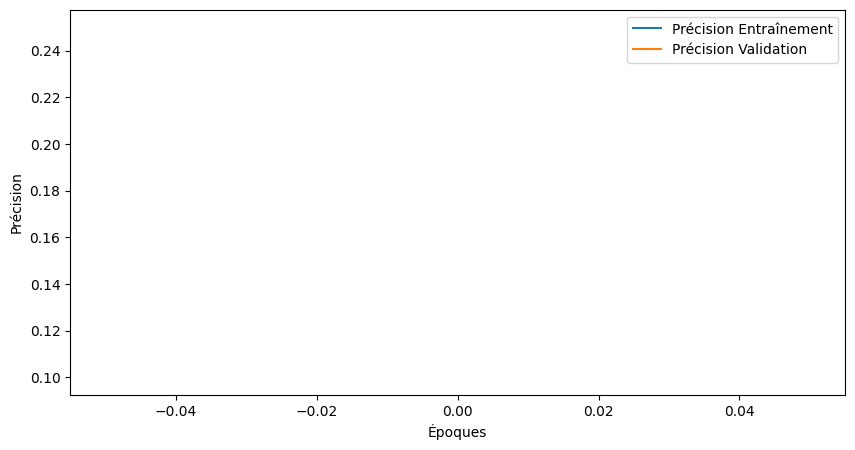


Époch 3 : La perte de validation a diminué à 3.7016. Modèle sauvegardé.
Précision validation : 0.1111

Prénoms générés :
- A
- Brhabp
- Cga
- Dmyhaad
- Eendhyntotkywsaaaav

Époch 8 : La perte de validation a diminué à 3.5203. Modèle sauvegardé.
Précision validation : 0.1111

Prénoms générés :
- Aqc
- Baeyvyxshosdh
- Cahytsavhvavkd
- Dx
- Emiyoakdhhyholahyaknh

Époch 10 : La perte de validation a diminué à 2.9404. Modèle sauvegardé.
Précision validation : 0.3333

Prénoms générés :
- Actvsnassayslakbadsra
- Bugiiwiszw
- Cjyhmr
- Dtnxsbctoekspakrcahse
- Eoj

Époch 47 : La perte de validation a diminué à 2.7065. Modèle sauvegardé.
Précision validation : 0.2857

Prénoms générés :
- Ax
- Btdpvnn
- Ckkdv
- Dt
- Eck

Époch 54 : La perte de validation a diminué à 2.6964. Modèle sauvegardé.
Précision validation : 0.4000

Prénoms générés :
- Ain
- Bxlegov
- Clkeklin
- Dluletvi
- E

Époch 123 : La perte de validation a diminué à 2.3589. Modèle sauvegardé.
Précision validation : 0.2500

Prénoms gé

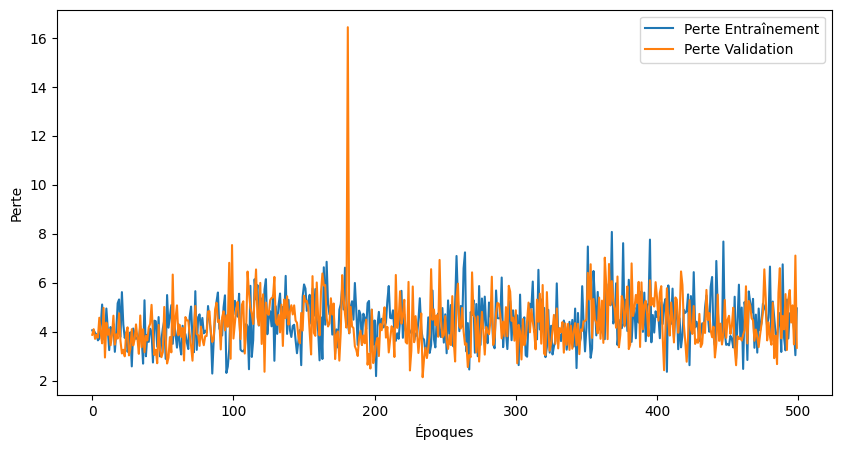

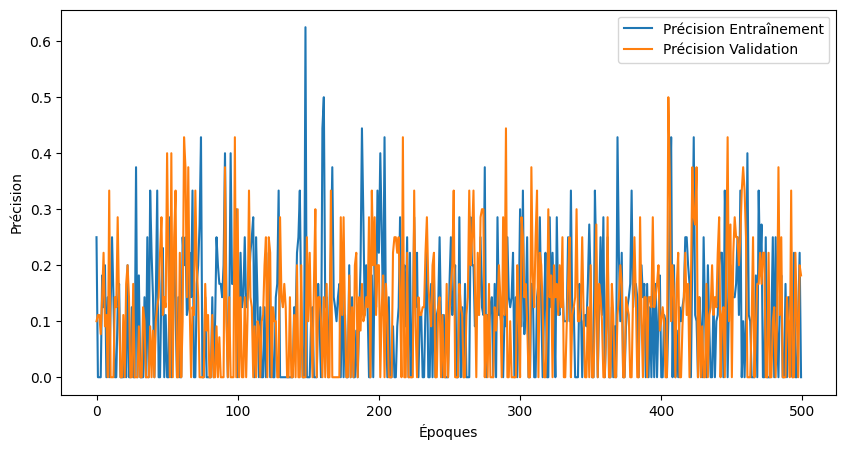

0m 30.01s Époch 1000/3000, Perte entraînement : 4.6172, Précision entraînement : 0.0000
Perte validation : 4.1719, Précision validation : 0.1111


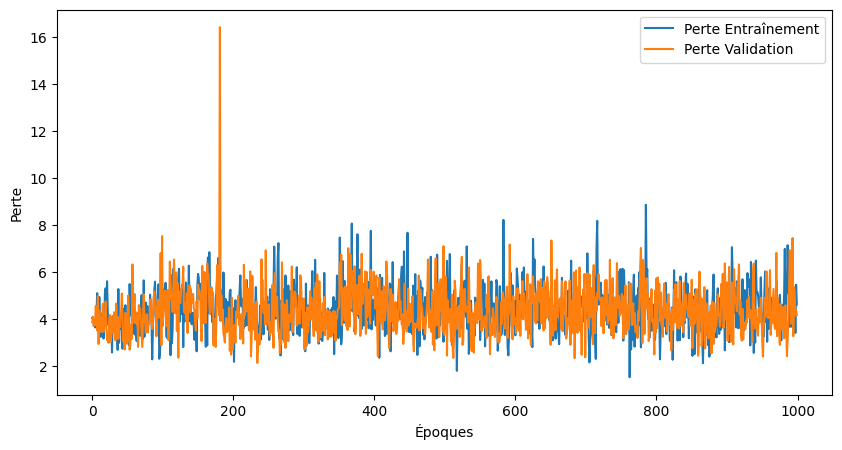

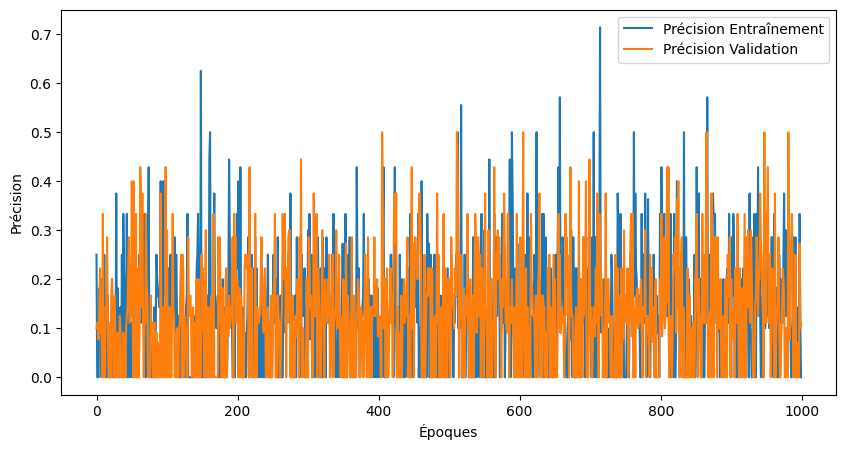


Époch 1153 : La perte de validation a diminué à 1.7148. Modèle sauvegardé.
Précision validation : 0.6667

Prénoms générés :
- Aeu
- Bsumiidddi
- Czhm
- Dilmond
- Eormpd
0m 44.64s Époch 1500/3000, Perte entraînement : 3.0133, Précision entraînement : 0.2500
Perte validation : 4.0257, Précision validation : 0.2500


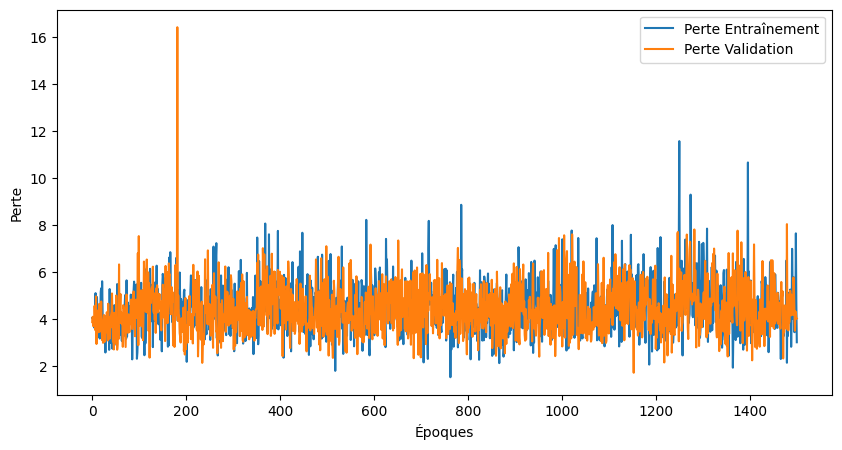

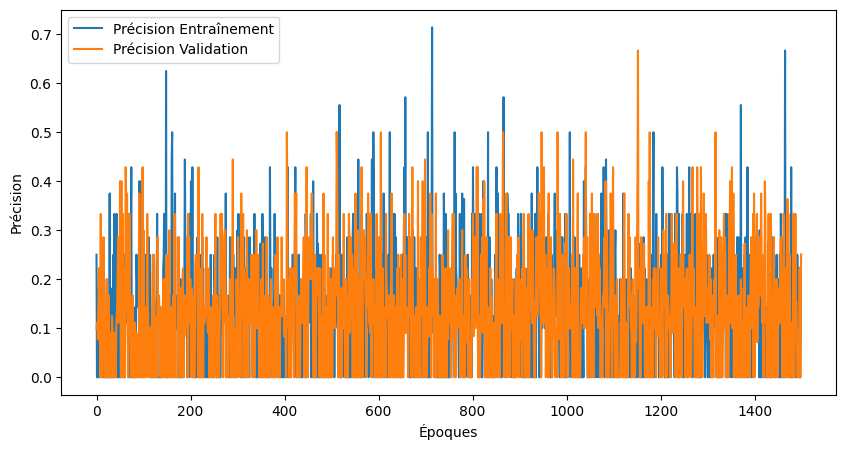


Époch 1581 : La perte de validation a diminué à 1.6051. Modèle sauvegardé.
Précision validation : 0.6000

Prénoms générés :
- Afso
- Basbkkkk
- Cbrbfk
- Deobkkkk
- Eivbjks
0m 59.26s Époch 2000/3000, Perte entraînement : 3.6526, Précision entraînement : 0.2222
Perte validation : 4.3442, Précision validation : 0.0000


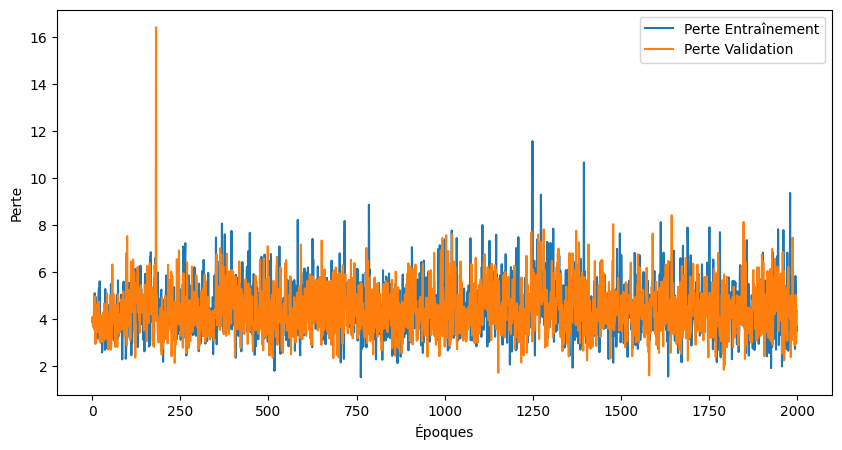

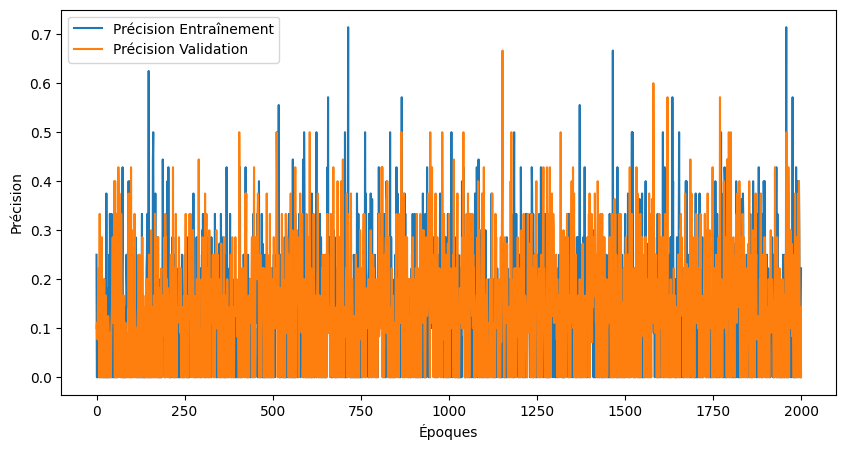


Époch 2073 : La perte de validation a diminué à 1.4401. Modèle sauvegardé.
Précision validation : 0.6667

Prénoms générés :
- Ayon
- Blidv
- Cnob
- D
- Ewhe
1m 14.53s Époch 2500/3000, Perte entraînement : 2.4458, Précision entraînement : 0.4286
Perte validation : 6.8230, Précision validation : 0.2222


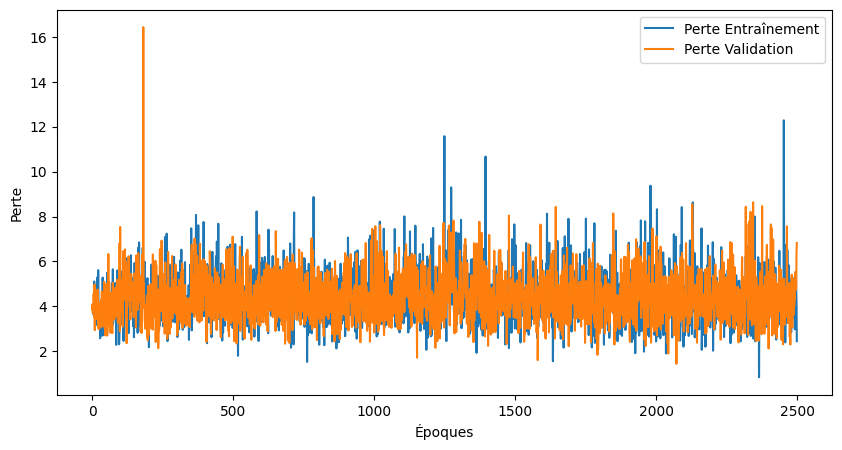

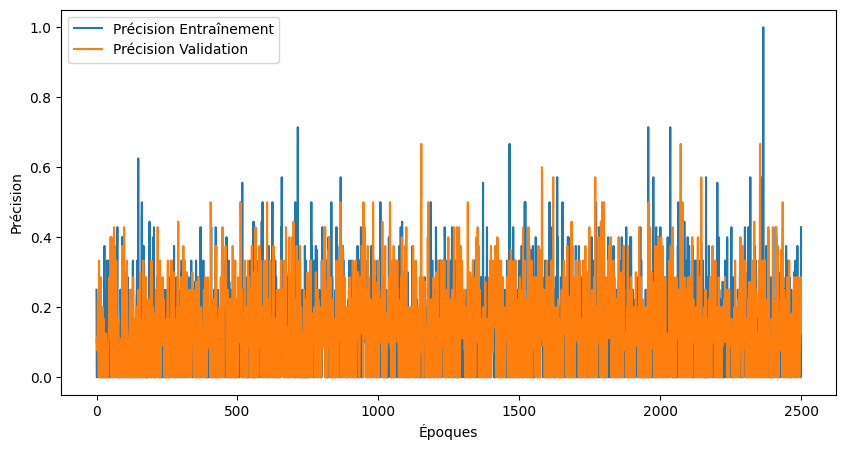

1m 28.99s Époch 3000/3000, Perte entraînement : 5.3780, Précision entraînement : 0.0000
Perte validation : 3.7131, Précision validation : 0.2222


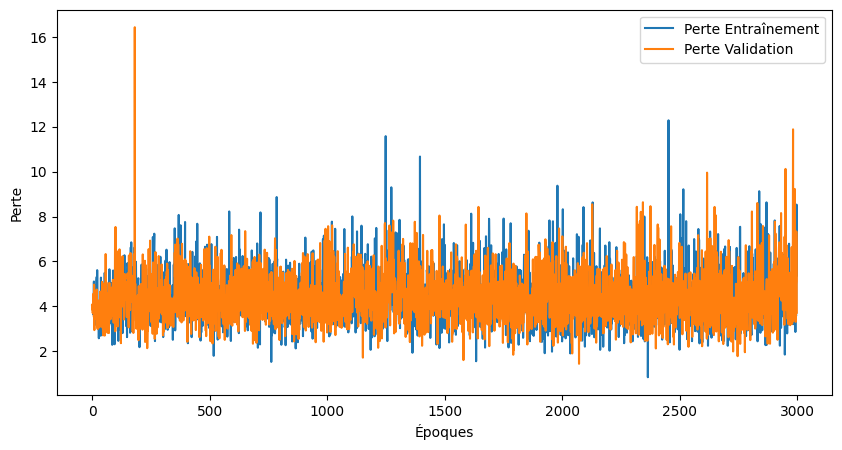

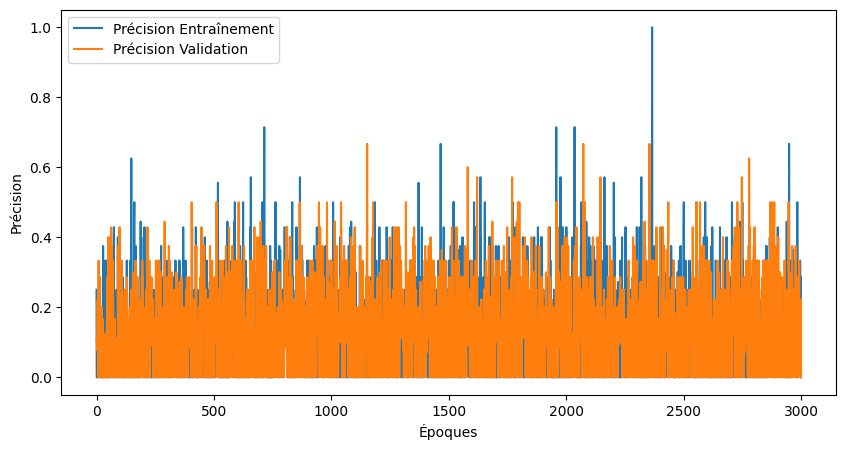


Chargement du meilleur modèle...

-----------
|  ÉVALUATION FINALE |
-----------

Perte moyenne sur l'ensemble de test : 3.4392
Précision moyenne sur l'ensemble de test : 0.1975

Prénoms générés avec le meilleur modèle :
- Aeddeenmvd
- Ahada
- Clredm
- Dkldm
- Gadmder
- Hidiinovev
- Joimvvv
- Khaev
- Khhdn
- Mmidv
- Oaidm
- Pdadeno
- Ryudredn
- Sredvnenmo
- Tadkn
- Tekde
- Uiddeondn
- Vann
- Vhvm
- Widmnneo


In [14]:
import requests
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import string
import random
import os
import matplotlib.pyplot as plt
import subprocess

# Vérification GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# Téléchargement des données
url = "https://olivier-fabre.com/passwordgenius/russian.txt"
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
data_path = os.path.join(data_dir, "russian.txt")
shuffled_data_path = os.path.join(data_dir, "russian_shuffled.txt")

if not os.path.exists(data_path):
    print("Téléchargement des données...")
    response = requests.get(url)
    with open(data_path, 'w', encoding='utf-8') as f:
        f.write(response.text)





def shuffle_file(input_path, output_path):
    """
    Désordonne les lignes d'un fichier en utilisant la commande Bash `shuf`.
    """
    try:
        subprocess.run(['shuf', input_path, '-o', output_path], check=True)
        print(f"Fichier mélangé avec succès : {output_path}")
    except FileNotFoundError:
        print("Erreur : La commande `shuf` n'est pas disponible. Assurez-vous qu'elle est installée.")
        exit(1)








# Chargement des données
def unicode_to_ascii(s):
    return ''.join(
        c for c in s if c in (string.ascii_letters + " .,;'-")
    )

def read_lines(filename):
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()

    # Filtrer et nettoyer les lignes
    clean_lines = []
    for line in lines:
        # Convertir en minuscules et supprimer les espaces autour
        line = line.strip().lower()
        # Vérifier que tous les caractères sont alphabétiques
        if all(c in string.ascii_letters for c in line) and len(line) >= 3:
            clean_lines.append(line)

    # Supprimer les doublons et trier les prénoms
    clean_lines = list(set(clean_lines))
    clean_lines.sort()

    return clean_lines


# Mélanger les lignes du fichier
shuffle_file(data_path, shuffled_data_path)

# Charger le fichier mélangé
lines = read_lines(shuffled_data_path)
print(f"Nombre de prénoms : {len(lines)}")

# Division des données
random.shuffle(lines)
train_split = int(0.7 * len(lines))
valid_split = int(0.2 * len(lines))
train_lines = lines[:train_split]
valid_lines = lines[train_split:train_split + valid_split]
test_lines = lines[train_split + valid_split:]
print(f"Ensemble d'entraînement : {len(train_lines)}, Validation : {len(valid_lines)}, Test : {len(test_lines)}")

# Paramètres globaux
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1  # EOS marker
hidden_size = 512
n_layers = 4
lr = 0.003
bidirectional = True
max_length = 20
n_epochs = 3000

# Fonctions utilitaires
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_letters.index(string[c])
    return tensor

def input_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def target_tensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)

def random_training_example(lines):
    line = random.choice(lines)
    input_line_tensor = input_tensor(line)
    target_line_tensor = target_tensor(line)
    return input_line_tensor, target_line_tensor

# Fonction pour afficher le temps écoulé
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m}m {s:.2f}s"

# Définition du modèle
class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=n_layers, bidirectional=self.bidirectional, batch_first=True
        )
        self.out = nn.Linear(self.num_directions * hidden_size, output_size)
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)
        hidden_concat = hidden if not self.bidirectional else torch.cat((hidden[0], hidden[1]), 1)
        output = self.out(hidden_concat)
        output = self.dropout(output)
        return self.softmax(output), hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions * n_layers, 1, self.hidden_size, device=device)

# Fonction pour générer des prénoms
def generate_prenoms(decoder, start_letters="ABCDE"):
    print("\nPrénoms générés :")
    for letter in start_letters:
        print(f"- {sample(decoder, letter)}")

def sample(decoder, start_letter="A", temperature=0.8):
    with torch.no_grad():
        hidden = decoder.init_hidden()
        input = input_tensor(start_letter)
        output_name = start_letter.lower()  # Commencer en minuscule
        for _ in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            # Appliquer la température
            probabilities = torch.exp(output / temperature)
            probabilities /= probabilities.sum()  # Normaliser les probabilités
            topi = torch.multinomial(probabilities, 1)[0][0]  # Échantillonnage multinomial
            if topi == n_letters - 1:  # Fin de chaîne
                break
            else:
                letter = all_letters[topi]
                if letter.isalpha():  # Garder uniquement les lettres
                    output_name += letter.lower()
                else:
                    break  # Arrêter si un caractère non alphabétique est généré
            input = input_tensor(letter)
        return output_name.capitalize()



# Entraînement avec sauvegarde
def train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion):
    target_line_tensor = target_line_tensor.to(device)
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0
    correct = 0  # Précision
    total = target_line_tensor.size(0)

    for i in range(input_line_tensor.size(0)):
        input_tensor = input_line_tensor[i].to(device)
        target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
        output, hidden = decoder(input_tensor, hidden.detach())
        l = criterion(output, target_tensor)
        loss += l

        # Calcul de la précision
        predicted = output.topk(1)[1][0][0]
        correct += (predicted == target_tensor[0]).item()

    loss.backward()
    decoder_optimizer.step()

    accuracy = correct / total
    return loss.item() / input_line_tensor.size(0), accuracy

def validation(input_line_tensor, target_line_tensor, decoder, criterion):
    with torch.no_grad():
        target_line_tensor = target_line_tensor.to(device)
        hidden = decoder.init_hidden().to(device)
        loss = 0
        correct = 0
        total = target_line_tensor.size(0)

        for i in range(input_line_tensor.size(0)):
            input_tensor = input_line_tensor[i].to(device)
            target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
            output, hidden = decoder(input_tensor, hidden.detach())
            l = criterion(output, target_tensor)
            loss += l

            # Calcul de la précision
            predicted = output.topk(1)[1][0][0]
            correct += (predicted == target_tensor[0]).item()

        accuracy = correct / total
        return loss.item() / input_line_tensor.size(0), accuracy

# Ajustement dynamique du taux d'apprentissage
def adjust_learning_rate(optimizer, epoch, decay_rate=0.5, step=20000):
    if epoch % step == 0 and epoch > 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate
            print(f"Taux d'apprentissage ajusté à : {param_group['lr']}")

# Suivi des pertes et précisions
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction principale d'entraînement
def training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion):
    print("\n-----------\n|  ENTRAÎNEMENT  |\n-----------\n")
    start = time.time()
    best_loss = float("inf")
    model_path = "best_model_generation_prenom.pth"

    for epoch in range(1, n_epochs + 1):
        adjust_learning_rate(decoder_optimizer, epoch)

        input_line_tensor, target_line_tensor = random_training_example(train_lines)
        train_loss, train_acc = train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion)

        input_line_tensor, target_line_tensor = random_training_example(valid_lines)
        val_loss, val_acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(decoder.state_dict(), model_path)
            print(f"\nÉpoch {epoch} : La perte de validation a diminué à {best_loss:.4f}. Modèle sauvegardé.")
            print(f"Précision validation : {val_acc:.4f}")
            generate_prenoms(decoder)

        if epoch % 500 == 0 or epoch == 1:
            print(f"{time_since(start)} Époch {epoch}/{n_epochs}, Perte entraînement : {train_loss:.4f}, Précision entraînement : {train_acc:.4f}")
            print(f"Perte validation : {val_loss:.4f}, Précision validation : {val_acc:.4f}")

            # Afficher les graphiques interactifs
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Perte Entraînement')
            plt.plot(val_losses, label='Perte Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Perte')
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.plot(train_accuracies, label='Précision Entraînement')
            plt.plot(val_accuracies, label='Précision Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Précision')
            plt.show()

# Évaluation finale
def evaluate_model(test_lines, decoder, criterion):
    print("\n-----------\n|  ÉVALUATION FINALE |\n-----------\n")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    decoder.eval()

    with torch.no_grad():
        for line in test_lines:
            input_line_tensor = input_tensor(line)
            target_line_tensor = target_tensor(line)
            loss, acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)
            total_loss += loss
            total_correct += acc * len(line)
            total_samples += len(line)

    avg_loss = total_loss / len(test_lines)
    avg_accuracy = total_correct / total_samples
    print(f"Perte moyenne sur l'ensemble de test : {avg_loss:.4f}")
    print(f"Précision moyenne sur l'ensemble de test : {avg_accuracy:.4f}")

    # Génération de 20 prénoms uniques avec le meilleur modèle
    print("\nPrénoms générés avec le meilleur modèle :")
    generated_names = set()
    attempts = 0  # Limiter les tentatives pour éviter les boucles infinies
    while len(generated_names) < 20 and attempts < 50:
        start_letter = random.choice(string.ascii_uppercase)  # Démarrer avec une lettre majuscule
        name = sample(decoder, start_letter)
        if len(name) >= 3:  # Assurer une taille minimale de 3 lettres
            generated_names.add(name)
        attempts += 1

    # Afficher les prénoms générés
    for name in sorted(generated_names):  # Trier pour lisibilité
        print(f"- {name}")




# Exécution principale
if __name__ == "__main__":
    decoder = RNNLight(n_letters, hidden_size, n_letters).to(device)
    #decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-5)
    decoder_optimizer = torch.optim.AdamW(decoder.parameters(), lr=lr, weight_decay=1e-5)

    criterion = nn.CrossEntropyLoss()

    print("Démarrage de l'entraînement...")
    training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion)

    print("\nChargement du meilleur modèle...")
    # Chargement sécurisé pour éviter tout code malveillant
    state_dict = torch.load("best_model_generation_prenom.pth", map_location=device, weights_only=True)
    decoder.load_state_dict(state_dict)
    evaluate_model(test_lines, decoder, criterion)